In [1]:
import seaborn as sns

/Users/kadomiii/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/kadomiii/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
from wordcloud import WordCloud

from PIL import ImageFont

In [3]:
try:
    font_path = "/Users/kadomiii/Downloads/ipaexg.ttf"
    font = ImageFont.truetype(font_path, size=40)  # Load font using Pillow
    print("Font loaded successfully!")
    wc = WordCloud(font_path=font_path, background_color="white")  # Pass the same path
    wc.generate("テスト")
    wc.to_file("wordcloud.png")
    print("WordCloud generated successfully!")
except Exception as e:
    print(f"Error: {e}")

Font loaded successfully!
WordCloud generated successfully!


In [5]:
import pandas as pd

,名詞,頻度
0,僕,271
1,君,249
2,世界,80
3,何,63
4,僕ら,61


In [9]:
fks = pd.read_csv("skowmsF_clean.csv")
fks.head()

,名詞,頻度
0,僕,271
1,君,249
2,世界,80
3,何,63
4,僕ら,61


In [10]:
fksdata = fks.set_index('名詞').to_dict()['頻度']

In [11]:
# FUKASE NOUNS ALL

wordcloud = WordCloud(background_color='white', colormap="Set2",font_path = '/Users/kadomiii/Downloads/ipaexg.ttf', width=1500, height=1200, max_words=500).generate_from_frequencies(fksdata)



In [12]:
wordcloud.to_file('./fukasems.png')

In [1364]:
pd.set_option('display.unicode.east_asian_width', True)

pndic = pd.read_csv(r"http://www.lr.pi.titech.ac.jp/~takamura/pubs/pn_ja.dic",
                    encoding="shift-jis",
                    names=['word_type_score'])
print(pndic)

                         word_type_score
0                 優れる:すぐれる:動詞:1
1              良い:よい:形容詞:0.999995
2            喜ぶ:よろこぶ:動詞:0.999979
3            褒める:ほめる:動詞:0.999979
4      めでたい:めでたい:形容詞:0.999645
...                                  ...
55120         ない:ない:助動詞:-0.999997
55121       酷い:ひどい:形容詞:-0.999997
55122       病気:びょうき:名詞:-0.999998
55123           死ぬ:しぬ:動詞:-0.999999
55124              悪い:わるい:形容詞:-1

[55125 rows x 1 columns]


In [1368]:
pndic[['word', 'hiragana', 'type', 'score']] = pndic['word_type_score'].str.split(':', expand=True)
pndic = pndic.drop(columns=['word_type_score'])
pndic['score'] = pndic['score'].astype(float)

print(pndic)


           word  hiragana    type     score
0        優れる  すぐれる    動詞  1.000000
1          良い      よい  形容詞  0.999995
2          喜ぶ  よろこぶ    動詞  0.999979
3        褒める    ほめる    動詞  0.999979
4      めでたい  めでたい  形容詞  0.999645
...         ...       ...     ...       ...
55120      ない      ない  助動詞 -0.999997
55121      酷い    ひどい  形容詞 -0.999997
55122      病気  びょうき    名詞 -0.999998
55123      死ぬ      しぬ    動詞 -0.999999
55124      悪い    わるい  形容詞 -1.000000

[55125 rows x 4 columns]


In [19]:
pndic['score'] = pndic['score'].astype(float)
nouns_pndic = pndic[pndic['type'] == '名詞'].copy()
nouns_pndic['score'] = nouns_pndic['score'].astype(float)
mergedic = pd.merge(fks, nouns_pndic[['word', 'score']], left_on='名詞', right_on='word', how='left')
mergedic = mergedic.drop(columns=['word']).rename(columns={'score': '感情スコア'})
noun_emotion = mergedic.dropna()
noun_emotionCleaned = noun_emotion.drop_duplicates(subset=['名詞'])

In [20]:
from matplotlib import pyplot as plt

In [1196]:
timeL.to_csv("skowfull.csv")

now let's delete the duplicates of mitsu no tsuki and shiori, which wasn't written by sekaowa

In [31]:
timeL[timeL['name'].str.contains('蜜の月', case=False, na=False)].index

Index([76], dtype='int64')

In [32]:
timeL[timeL['name'].str.contains('栞', case=False, na=False)].index

Index([24], dtype='int64')

In [30]:
timeL = timeL.drop(75)

In [33]:
timeL = timeL.drop(24)

In [182]:
timeL.loc[[6]]

,Unnamed: 0,name,kashi,date,lyricist,composer
6,6,illusion,命の並んだ午前零時のスーパーマーケットこれから食べる命を選ぶんだTVで放送されている爆弾が降...,2012/07/18,Fukase,Saori・Fukase


In [1057]:
timeL

,name,kashi,date,lyricist,composer
0,青い太陽,"Our sun exists independently of all stars,and ...",2010/04/07,Fukase,Fukase・Nakajin
1,ANTI-HERO,You know I don't give a damn about what's“righ...,2015/07/29,Fukase・補作詞：Nelson Babin-Coy,Nakajin
2,umbrella,鏡に映る私は透明だった分かってた事でも知らないままの方が良かった私は君を濡らすこの忌々しい雨...,2020/06/24,Fukase,Fukase・Saori
3,アースチャイルド,僕らはEarth Child世界中を冒険飛行どこまでも行こうこの夜空に眠れない君を連れて夢を...,2013/05/01,Saori,Nakajin
4,RPG,空は青く澄み渡り 海を目指して歩く怖いものなんてない 僕らはもう一人じゃない大切な何かが壊れ...,2013/05/01,Saori・Fukase,Fukase
...,...,...,...,...,...
86,LOVE SONG,いつの時代もいるんだ「大人はいつも矛盾ばっかり」とか「嘘ばっかり」って言うKid今の君はどう...,2019/02/27,Fukase,Saori・Nakajin
87,Re:set,迎える朝 何度目の事真っ暗な部屋 子供達の声頭が鉛 体が鉄朦朧とする意識と記憶這いずり回るベ...,2019/02/27,Fukase,Fukase
88,RAIN,魔法は いつか解けると 僕らは知ってる月が咲いて太陽が今枯れた傘を差し出す君に映る僕は濡れて...,2017/07/05,Fukase・Saori,Nakajin・Fukase・Saori
89,ROBO,Ah 僕はまるで動かなくなったロボットみたいな目をしてるハートは錆びてしまったアームをだらん...,2023/08/22,Saori,Nakajin


# classify by era
## 2010: pre-debut
Although it's a relatively short period, a lot of these songs have a long history dating back as far as the early 2000s.

Fukase was the sole contributor to lyric-writing at this point. Therefore, we also need to take into account the fact that significant life-changing events occured as he was transitioning from teen to young adulthood. It's to be expected that their pre-debut style differs slightly from their post-debut songs, which they wrote in their early - mid twenties.

In [225]:
pre_debut = timeL[timeL['date'].str.contains('2010', case=False)]

In [226]:
pre_debut.reset_index(drop = True, inplace = True)
pre_debut.index += 1
pre_debut

,name,kashi,date,lyricist,composer
1,青い太陽,"Our sun exists independently of all stars,and ...",2010/04/07,Fukase,Fukase・Nakajin
2,インスタントラジオ,カボチャを割って生まれた「Radio」怪物は美女とPoprock「Radio」満月の提供 骸...,2010/04/07,Fukase,Fukase・Nakajin
3,死の魔法,HELLO“GOODBYE”今までありがとう今まで僕が作ってきたものが全て無くなってしまうH...,2010/04/07,Fukase,Fukase
4,世界平和,人間という怪物は「セカイ平和」という戦争を起こしてる平和なんて化け物は本当は存在していない普...,2010/04/07,Fukase,Fukase
5,天使と悪魔,「いじめは正義だから 悪をこらしめているんだぞ」そんな風に子供に教えたのは 僕らなんだよ大人...,2010/11/03,Fukase,Fukase
6,虹色の戦争,花に声があるなら何を叫ぶのだろう「自由の解放」の歌を世界に響かせているだろう平和に耳があるな...,2010/04/07,Fukase,Fukase
7,白昼の夢,夕陽が僕を起こして深い海に沈んでいく僕の好きな夜がきて暗い部屋で一人きり花束持って出掛けても...,2010/04/07,Fukase,Fukase
8,ファンタジー,Let's sing a song Wipe your tearsand people Le...,2010/11/03,Fukase,Fukase
9,幻の命,白い星が降る夜に 僕からの賛美歌を蒼い銀河の彼方にUFOが 君を連れて消えていく白い病院で死...,2010/04/07,Fukase,Saori


## 2011-2012: major debut

there were 13 songs from 2011-2012, which covers INORI EP and ENTERTAINMENT

In [203]:
major_debut = timeL[timeL['date'].str.contains('2011|2012', case=False)]

In [204]:
major_debut.reset_index(drop = True, inplace = True)
major_debut.index += 1
major_debut

,name,kashi,date,lyricist,composer
1,illusion,命の並んだ午前零時のスーパーマーケットこれから食べる命を選ぶんだTVで放送されている爆弾が降...,2012/07/18,Fukase,Saori・Fukase
2,花鳥風月,いつから夜空の星の光に気づかなくなったのかな 夏の空を見上げる私は何か忘れていましたか「さよ...,2011/08/17,Saori,Fukase
3,スターライトパレード,Welcome to the “STARLIGHT PARADE”星が降る眠れない夜にもう一...,2011/11/23,Fukase,Nakajin
4,生物学的幻想曲,「子孫をのこし繁殖する」これが僕が産まれた「理由」で僕も「命のサイクル」の中の一つでしかない...,2012/05/30,Fukase,Fukase
5,TONIGHT,不思議に感じる瞬間が時々ある僕が今ここにいるというこの事実が僕に特別な力があるとはとても思え...,2012/07/18,Nakajin,Nakajin
6,Never Ending World,「人」と描いて他人という意味のこの国はヒトを恐れて生きてきたけれど「人」の「間」にあるものは...,2011/08/17,Fukase,Saori
7,眠り姫,君と僕とで世界を冒険してきたけど泣いたり笑ったりして僕らはどんなときでも手を繋いできたけどい...,2012/05/30,Fukase,Fukase
8,Fight Music,あぁもう嫌になっちゃうな、ほんと何も上手くいかないや戦うべき「敵」は本当は僕らは分かってる9...,2012/07/18,Fukase,Fukase
9,深い森,Inside the birdcage freedom is sungSo loud tha...,2012/07/18,Fukase・補作詞：Nelson Babin-Coy,Fukase
10,不死鳥,人類の発明 君は最新型ロボット僕らと違うのはただひとつそう君は不死身なんだ夏が始まったとき僕...,2011/08/17,Fukase,Nakajin


## 2013-2014: fantasy!

can you believe there were only 9 new songs released in total across these 2 years? from this point on, we can observe other band members beginning to contribute to lyric-writing as well as composing

In [208]:
fantasy = timeL[timeL['date'].str.contains('2013|2014', case=False)]
fantasy.reset_index(drop = True, inplace = True)
fantasy.index += 1
fantasy

,name,kashi,date,lyricist,composer
1,アースチャイルド,僕らはEarth Child世界中を冒険飛行どこまでも行こうこの夜空に眠れない君を連れて夢を...,2013/05/01,Saori,Nakajin
2,RPG,空は青く澄み渡り 海を目指して歩く怖いものなんてない 僕らはもう一人じゃない大切な何かが壊れ...,2013/05/01,Saori・Fukase,Fukase
3,銀河街の悪夢,明日に住みついてる幻覚の名前は皆さんご存知「希望」というアレです未来なんて来なけりゃ皆とのこ...,2014/01/22,Fukase,Nakajin
4,スノーマジックファンタジー,スノーマジックファンタジー雪の魔法にかけられて僕は君に恋したもしかして君は雪の妖精?僕は星の...,2014/01/22,Fukase,Nakajin
5,Death Disco,君に神はいないいわゆる無神論者神が定めたキリツなど、君にとっちゃ関係もないはずそのはずなのに...,2013/10/30,Fukase,Nakajin・Fukase
6,Dragon Night,今宵は百万年に一度太陽が沈んで夜が訪れる日終わりの来ないような戦いも今宵は休戦して祝杯をあげ...,2014/10/15,Fukase,Fukase
7,ピエロ,森の中のサーカスの君はそこのピエロでいつもおどけてみせて、皆を笑わせようとするどんな悲しいと...,2014/04/09,Fukase,Nakajin・Fukase
8,炎と森のカーニバル,YOKOHAMAにある遊園地の「コスモパニック」の非常口がこのパーティーのエントランス扉を開...,2014/04/09,Fukase,Fukase
9,MAGIC,僕はね、君のこと初めて見たときこの世界に産まれてきた意味がわかったんだ君を見るたび、胸がとき...,2014/10/15,Fukase,Hawaiian6


In [889]:
fantasy.to_csv('fantasyfull.csv')

## 2015-2018: pop!

In [209]:
what = timeL[timeL['date'].str.contains('2015|2016|2017|2018', case=False)]
what.reset_index(drop = True, inplace = True)
what.index += 1
what

,name,kashi,date,lyricist,composer
1,ANTI-HERO,You know I don't give a damn about what's“righ...,2015/07/29,Fukase・補作詞：Nelson Babin-Coy,Nakajin
2,SOS,"For you, I'll sing this songPlease stay, it wo...",2015/09/25,Saori・補作詞：Nelson Babin-Coy,Fukase
3,Error,僕は戦うために作られた軍事用ロボットとして生まれたたくさんの人を傷付けて、勝つたびに褒められ...,2016/10/05,Fukase,Nakajin・Saori・Fukase
4,サザンカ,ドアの閉まる音 カレンダーの印部屋から聞こえる 君の泣き声逃げる事の方が怖いと君は夢を追い続...,2018/02/28,Fukase・Saori,Nakajin・Fukase
5,スターゲイザー,それは死体が腐敗していくように学校へ毎日通うように夫婦が一生添い遂げるように花は摘めば枯れて...,2017/07/05,Fukase,Fukase
6,broken bone,最後の公演を終えた日、僕は酒に溺れてた満月が照らすその店で、僕の野望を謳ってたいつまでも、僕...,2015/01/14,Fukase,Fukase
7,PLAY,「おはよう」さあ始めようかゲーム開始のファンファーレ消えた宝の地図を右手にこん棒左手に出発だ...,2015/01/14,Saori,Saori
8,プレゼント,「知らない」という言葉の意味間違えていたんだ知らない人のこといつの間にか「嫌い」と言っていた...,2015/09/25,Saori,Nakajin
9,Hey Ho,ぼろぼろの思い出とかばらばらに壊れた気持ちも大事にしたから大切になった初めから大切なものなん...,2016/10/05,Saori・Fukase,Nakajin
10,Home,僕たちは家を作った 大きな大きな家を何年も何年も手作りでたくさんの明かりを灯した暖かいHom...,2015/07/29,Fukase,Nakajin


## pre-scent of memory

this era deserves a place of its own. it's also my favorite era, mostly because i was heavily involved in oshikatsu during this era, lol.

In [211]:
pre2021 = timeL[timeL['date'].str.contains('2019|2020', case=False)]
pre2021.reset_index(drop = True, inplace = True)
pre2021.index += 1
pre2021

,name,kashi,date,lyricist,composer
1,umbrella,鏡に映る私は透明だった分かってた事でも知らないままの方が良かった私は君を濡らすこの忌々しい雨...,2020/06/24,Fukase,Fukase・Saori
2,イルミネーション,君に似合うのはきっと赤でも青でも黄色でもないどんな炎に焼かれてもただ一つ残る色だ幸せになるに...,2019/02/27,Saori・Fukase,Saori・Nakajin
3,Witch,人が生まれて何万年？それは信じる光によって違う光が生み出す強烈な影正しい道を指す光はやがて魔...,2019/02/27,Fukase,Fukase・Nakajin
4,エデン,例えばさ 宇宙にある愛の言葉すべてを君にさ 伝えても君は満足しないんでしょう？それならば い...,2019/02/27,Fukase,Fukase
5,カレイドスコープ,この心の奥の結晶が僕を特別にしてくれると思ってたでも誰かと比べてはいつも愕然としてどこを切り...,2020/12/16,Nakajin,Nakajin
6,Goodbye,真実を追い求めた者たちの熱情がその名を歴史に焼き付けていった運命に怯えるだけだった僕にも静か...,2019/02/27,Nakajin,Nakajin
7,コードレスベイビー,繋がっている時の記憶なんてないよと君は言うけれど十月十日の波乱万丈な日越えてジョキンと切った...,2020/12/16,Saori,Saori
8,silent,純白の雪が降る街から音が全て奪われていったこんなに静かだと閉じ込めた言葉も聴こえてしまいそう...,2020/10/21,Fukase,Nakajin・Fukase
9,周波数,額縁の中で笑うギター少年の君に僕らの歌が 届かないなんて誰も説明出来ないどんなに偉い科学者さ...,2020/06/24,Saori,Saori
10,すべてが壊れた夜に,人々は言う 分かっているとそんな当たり前な事は知ってるとでも知ってる事を分かってるならそんな...,2019/02/27,Fukase,Fukase


In [633]:
pre2021[pre2021['name'].str.contains('俺', case=False, na=False)].index

Index([], dtype='int64')

## 2021-2024

if you know, you know. literally EVERYTHING except ターコイズ was composed by either Saori or Nakajin during this era. gigachads.

In [212]:
iykyk = timeL[timeL['date'].str.contains('2021|2022|2023', case=False)]
iykyk.reset_index(drop = True, inplace = True)
iykyk.index += 1
iykyk

,name,kashi,date,lyricist,composer
1,Eve,人目を気にして来たイルカショー君はサングラスとハットをつけたまま「可愛いけれど淘汰されるわ時...,2022/06/22,Fukase,Nakajin
2,エンドロール,僕達が住んでた家が壊される夢を見た凄く大きな青いショベルカーで僕は起きたら泣いていたクジラを...,2022/02/09,Fukase,Nakajin
3,陽炎,貴方はきっと知らないでしょう夜明けに目覚めた私がどんな風にどんな想いでもう一度目を閉じたのか...,2021/07/21,Saori,Saori
4,最高到達点,弱さを味方につけた僕は誰よりも高く飛べるのだからこんなところで止まってたら無くしたものが輝か...,2023/09/17,Fukase,Nakajin
5,サラバ,失ったものばかり値がついたいつだって時の中で変わった何でだってこんな！ Ahよってたかってそ...,2023/04/19,Saori,Nakajin
6,ターコイズ,大きな声で夢を謳ったみんなの前でカッコ悪いくらいに誰よりもそれを聴いていたのは他ならぬ僕自身...,2023/05/16,Fukase,Fukase
7,Diary,それまで一人の物語だった突然君が現れるまではページめくった先で 君と巡り合った見開きで恋をし...,2022/02/09,Saori,Saori・Nakajin
8,tears,初めは嫌いだった君が僕を嫌ってそうだったから君も同じだったと聞いたのはそのずっとあと調子はど...,2021/07/21,Fukase,Fukase・Nakajin
9,Habit,君たちったら何でもかんでも分類、区別、ジャンル分けしたがるヒトはなぜか分類したがる習性がある...,2022/06/22,Fukase,Nakajin
10,バタフライエフェクト,予測困難な未来をくぐり抜け無意味な混乱と秩序繰り返して小さな攪乱の揺らめきを起こす複雑な最短...,2023/06/28,Saori,Saori


In [1047]:
iykyk.to_csv("iykyk_full.csv")

In [213]:
tk24 = timeL[timeL['date'].str.contains('2024', case=False)]
tk24.reset_index(drop = True, inplace = True)
tk24.index += 1
tk24

,name,kashi,date,lyricist,composer
1,深海魚,真っ暗な世界に潜ってたんだまっぴらごめんだ 捕食されんのはぱっくり開けた口に飲み込まれたベイ...,2024/03/13,Saori,Nakajin・Saori
2,タイムマシン,タイムマシンに乗ってチクタクチクタク君といた記憶を消し去るためにこんなに苦しいなら君に出逢う...,2024/03/13,Fukase,Saori
3,デッドエンド,クタクタの足を何とか引きずって現れたのは行き止まりだったがむしゃらに走ってきた道を振り返る引...,2024/03/13,Fukase,Nakajin
4,ユートピア,僕のユートピアは君の言う通りで辿り着くと音を立てて崩れていった貴方が貴方のままだから私は好き...,2024/03/13,Fukase,Fukase
5,Romantic,魔法が解けてどれくらい前はどう見えてた？この世界優しい嘘で包んでよ春が来るって誰かが止まない...,2024/05/10,Fukase,Nakajin


In [294]:
dataframes = [pre_debut, major_debut, fantasy, what, pre2021, iykyk, tk24]

def calculate_total_stats(dfs):
    results = []
    for df in dfs:
        fukase_count = df['composer'].str.contains('Fukase').sum()
        nakajin_count = df['composer'].str.contains('Nakajin').sum()
        saori_count = df['composer'].str.contains('Saori').sum()
        total_songs = len(df)
        fukase_percentage = round((fukase_count / total_songs), 2)
        nakajin_percentage = round((nakajin_count / total_songs), 2)
        saori_percentage = round((saori_count / total_songs), 2)
        results.append({
            'fCount': fukase_count,
            'fComposed%': fukase_percentage,
            'nCount': nakajin_count,
            'nComposed%': nakajin_percentage,
            'sCount': saori_count,
            'sComposed%': saori_percentage,
            'totalSongs': total_songs,

        })
    return results

total_stats = calculate_total_stats(dataframes)

In [ ]:
total_statsx

In [431]:
totaldf = pd.DataFrame(total_stats)
years = pd.DataFrame({'era': ['2010\n\nインディーズ', '2011-2012\n\nメジャーデビュー', '2013-2014\n\nファンタジー', '2015-2018\n\nポップス', '2019-2020\n\n実験音楽', '2021-2023\n\nあれ、なんかあった', '2024\n\n今']})

totalResults = pd.concat([years, totaldf], axis=1)
totalResults.index += 1
totalResults

,era,fCount,fComposed%,nCount,nComposed%,sCount,sComposed%,totalSongs
1,2010\n\nインディーズ,8,0.89,2,0.22,1,0.11,9
2,2011-2012\n\nメジャーデビュー,7,0.54,5,0.38,3,0.23,13
3,2013-2014\n\nファンタジー,5,0.56,5,0.56,0,0.00,9
4,2015-2018\n\nポップス,7,0.54,8,0.62,3,0.23,13
5,2019-2020\n\n実験音楽,13,0.52,13,0.52,7,0.28,25
6,2021-2023\n\nあれ、なんかあった,4,0.27,12,0.80,4,0.27,15
7,2024\n\n今,1,0.20,3,0.60,2,0.40,5


In [441]:
totalResults

,era,fCount,fComposed%,nCount,nComposed%,sCount,sComposed%,totalSongs
1,2010\n\nインディーズ,8,0.89,2,0.22,1,0.11,9
2,2011-2012\n\nメジャーデビュー,7,0.54,5,0.38,3,0.23,13
3,2013-2014\n\nファンタジー,5,0.56,5,0.56,0,0.00,9
4,2015-2018\n\nポップス,7,0.54,8,0.62,3,0.23,13
5,2019-2020\n\n実験音楽,13,0.52,13,0.52,7,0.28,25
6,2021-2023\n\nあれ、なんかあった,4,0.27,12,0.80,4,0.27,15
7,2024\n\n今,1,0.20,3,0.60,2,0.40,5


In [450]:
new

,era,totalSongs,Composer,Composed_Songs
0,2010\n\nインディーズ,9,Fukase,8
1,2011-2012\n\nメジャーデビュー,13,Fukase,7
2,2013-2014\n\nファンタジー,9,Fukase,5
3,2015-2018\n\nポップス,13,Fukase,7
4,2019-2020\n\n実験音楽,25,Fukase,13
5,2021-2023\n\nあれ、なんかあった,15,Fukase,4
6,2024\n\n今,5,Fukase,1
7,2010\n\nインディーズ,9,Nakajin,2
8,2011-2012\n\nメジャーデビュー,13,Nakajin,5
9,2013-2014\n\nファンタジー,9,Nakajin,5


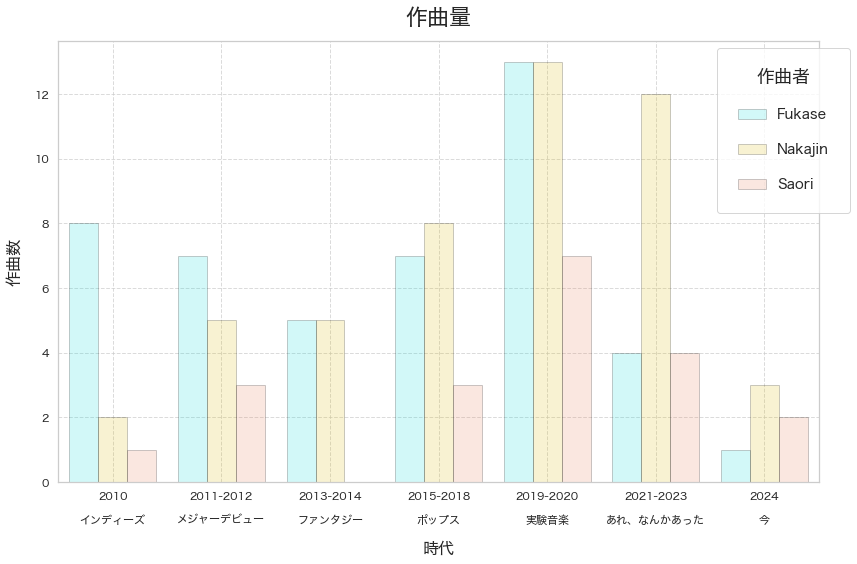

In [458]:
new = pd.melt(totalResults, id_vars=['era', 'totalSongs'], 
                  value_vars=['fCount', 'nCount', 'sCount'], 
                  var_name='Composer', value_name='Composed_Songs')

new['Composer'] = new['Composer'].map({
    'fCount': 'Fukase',
    'nCount': 'Nakajin',
    'sCount': 'Saori'
})
plt.figure(figsize=(12, 8))
sns.set(font='Hiragino Sans', style="whitegrid")

# Plotting the histograms for each composer
sns.barplot(data=new, x='era', y = 'Composed_Songs', hue='Composer', palette=['aqua', 'gold', 'coral'],alpha=0.2, edgecolor="black")

plt.title("作曲量", fontsize=22, pad =16)
plt.xlabel("時代", fontsize=16, labelpad = 16)
plt.ylabel("作曲数", fontsize=16, labelpad=12)
#plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)



plt.legend(title="作曲者", 
           fontsize=14, 
           title_fontsize=18,
           labelspacing=1.5,
           #handles=handles,
           borderpad=1.5,
           bbox_to_anchor=(1.05, 1))

plt.tight_layout()

plt.show()

In [ ]:
df_long = pd.melt(totalResults, id_vars=['era', 'totalSongs'], 
                  value_vars=['fComposed%', 'nComposed%', 'sComposed%'], 
                  var_name='Composer', value_name='Composed%')

In [432]:


df_long = pd.melt(totalResults, id_vars=['era', 'totalSongs', 'fCount', 'nCount', 'sCount'], 
                  value_vars=['fComposed%', 'nComposed%', 'sComposed%'], 
                  var_name='Composer', value_name='Composed%')
df_long['Composer'] = df_long['Composer'].map({
    'fComposed%': 'Fukase',
    'nComposed%': 'Nakajin',
    'sComposed%': 'Saori'
})

def get_count(row):
    if row['Composer'] == 'Fukase':
        return row['fCount']
    elif row['Composer'] == 'Nakajin':
        return row['nCount']
    else:  # 'Saori'
        return row['sCount']

df_long['Count'] = df_long.apply(get_count, axis=1)

# Normalize the 'Count' values for better marker size scaling
df_long['Size'] = df_long['Count'] * 20 
df_long

,era,totalSongs,fCount,nCount,sCount,Composer,Composed%,Count,Size
0,2010\n\nインディーズ,9,8,2,1,Fukase,0.89,8,160
1,2011-2012\n\nメジャーデビュー,13,7,5,3,Fukase,0.54,7,140
2,2013-2014\n\nファンタジー,9,5,5,0,Fukase,0.56,5,100
3,2015-2018\n\nポップス,13,7,8,3,Fukase,0.54,7,140
4,2019-2020\n\n実験音楽,25,13,13,7,Fukase,0.52,13,260
5,2021-2023\n\nあれ、なんかあった,15,4,12,4,Fukase,0.27,4,80
6,2024\n\n今,5,1,3,2,Fukase,0.20,1,20
7,2010\n\nインディーズ,9,8,2,1,Nakajin,0.22,2,40
8,2011-2012\n\nメジャーデビュー,13,7,5,3,Nakajin,0.38,5,100
9,2013-2014\n\nファンタジー,9,5,5,0,Nakajin,0.56,5,100


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


glue = sns.load_dataset("glue").pivot(index="era", columns="Task", values="Score")


f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [412]:
from matplotlib.lines import Line2D


In [323]:
from matplotlib import rcParams

rcParams['font.family'] = 'Hiragino Sans'

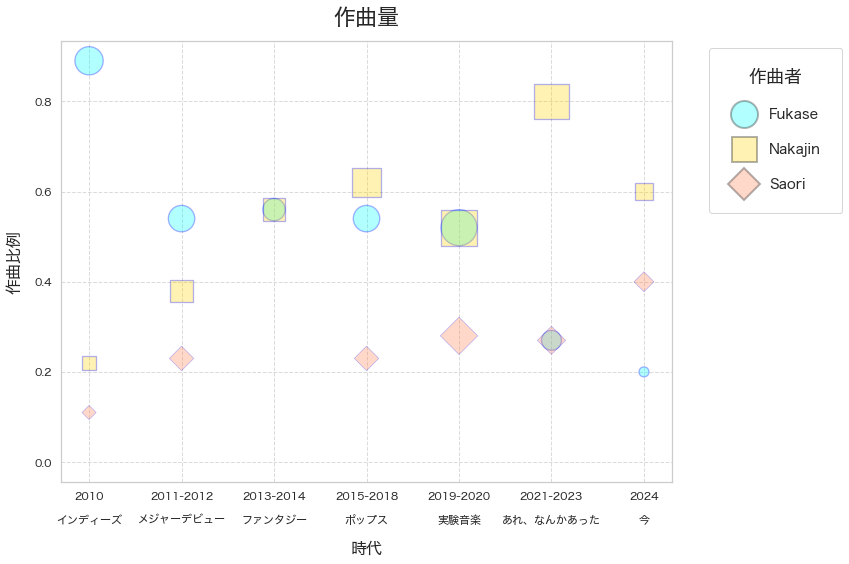

In [434]:
plt.figure(figsize=(12, 8))
sns.set(font='Hiragino Sans', style="whitegrid")
#sns.set_style("whitegrid")
markers = {"Fukase": "o", "Nakajin": "s", "Saori": "D"}

for composer, marker in markers.items():
    composer_data = df_long[df_long['Composer'] == composer]

    sns.scatterplot(data=df_long[df_long['Composer'] == composer], 
                    x="era", y="Composed%", 
                    marker=marker, 
                    s=composer_data['Size']*5,
                    label=composer, 
                    color=sns.color_palette(['aqua', 'gold', 'coral'])[list(markers.keys()).index(composer)],
                    edgecolor='blue', alpha=0.3)
    
plt.title("作曲量", fontsize=22, pad =16)
plt.xlabel("時代", fontsize=16, labelpad = 16)
plt.ylabel("作曲比例", fontsize=16, labelpad=12)
#plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)


handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='aqua', markersize=27, alpha=0.3, markeredgecolor='black',label='Fukase', markeredgewidth=2),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gold', markersize=25, alpha=0.3, markeredgecolor='black',label='Nakajin', markeredgewidth=2),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='coral', markersize=23, alpha=0.3, markeredgecolor='black',label='Saori', markeredgewidth=2)
]
plt.legend(title="作曲者", 
           fontsize=14, 
           title_fontsize=18,
           labelspacing=1.5,
           handles=handles,
           borderpad=1.5,
           bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


ValueError: bottom cannot be >= top

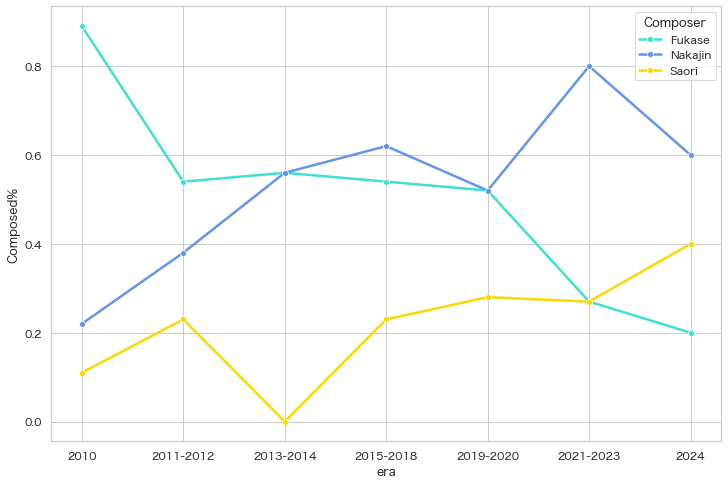

In [386]:
plt.figure(figsize=(12, 8))
sns.set(font='Hiragino Sans', style="whitegrid")
#sns.set_style("whitegrid")
markers = {"Fukase": "o", "Nakajin": "s", "Saori": "D"}
sns.lineplot(data=df_long, x="era", y="Composed%", hue="Composer", marker='o', palette=['turquoise','cornflowerblue','gold'], linewidth = 2.5)


era_labels = ['a', 
              'b', 
              'c',
              'd', 
              'e', 
              'f',
             'aaa']
plt.subplots_adjust(bottom=2)
# Adjust the y-coordinate so that the text is below the x-axis
for i, label in enumerate(era_labels):
    plt.text(df_long['era'].iloc[i], -5, label, ha='center', va='center', fontsize=12, color='black')

plt.title("作曲量", fontsize=22, pad =16)
plt.xlabel("時代", fontsize=16, labelpad = 12)
plt.ylabel("作曲比例", fontsize=16, labelpad=12)
#plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="作曲者")
plt.tight_layout()
plt.show()




<Axes: xlabel='era', ylabel='Composed%'>

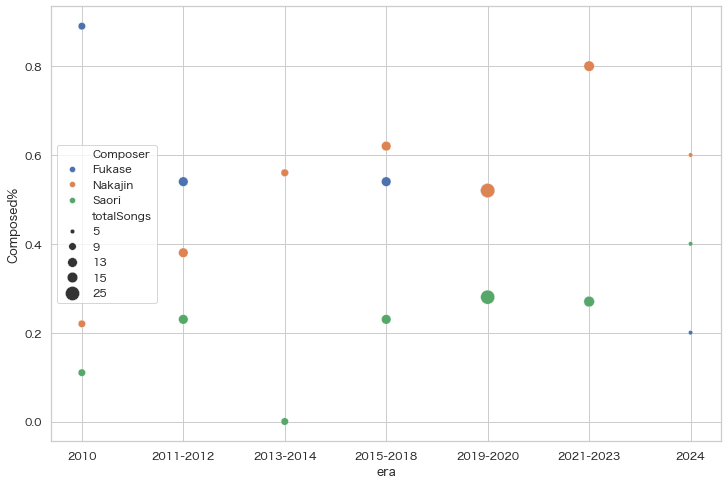

In [408]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_long,
    x='era',
    y='Composed%',
    hue = 'Composer',
    size='totalSongs',
    sizes=(20, 200)
)

In [246]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

palette = sns.color_palette("rocket_r")

sns.relplot(
    data=dots,
    x="era", y="fComposed", hue = '' size = 'fCount', col="align", kind="line", palette='hls', height=5, aspect=.75, facet_kws=dict(sharex=False),
)

ValueError: Could not interpret value `era` for `x`. An entry with this name does not appear in `data`.

# noun frequency data

## noun pre

In [607]:
from janome.tokenizer import Tokenizer
import collections

pre_debut_lyrics = pre_debut['kashi'].tolist()
t = Tokenizer()
pdresults = []
for s in pre_debut_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    pdresults.extend(result)
predebutCol = collections.Counter(pdresults)

In [608]:
df_pd = pd.DataFrame.from_dict(predebutCol, orient='index', columns=['頻度']).reset_index()
df_pd.columns = ['名詞', '頻度']
df_pd = df_pd.sort_values(by='頻度', ascending=False)
df_pd = df_pd[df_pd['名詞'].isin(fulll['名詞'])]
df_pd.to_csv("predebut.csv")

## maj

In [594]:
majordebut_lyrics = major_debut['kashi'].tolist()
t = Tokenizer()
mdresults = []
for s in majordebut_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    mdresults.extend(result)
majordebutCol = collections.Counter(mdresults)

In [595]:
df_md = pd.DataFrame.from_dict(majordebutCol, orient='index', columns=['頻度']).reset_index()
df_md.columns = ['名詞', '頻度']
df_md = df_md.sort_values(by='頻度', ascending=False)
df_md = df_md[df_md['名詞'].isin(fulll['名詞'])]
df_md.to_csv("majordebut.csv")

## noun fan

In [596]:
fantasy_lyrics = fantasy['kashi'].tolist()
t = Tokenizer()
fanresults = []
for s in fantasy_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    fanresults.extend(result)
fantasyCol = collections.Counter(fanresults)

In [598]:
df_fan = pd.DataFrame.from_dict(fantasyCol, orient='index', columns = ['頻度']).reset_index()
df_fan.columns = ['名詞', '頻度']
df_fan = df_fan.sort_values(by='頻度', ascending=False)
df_fan = df_fan[df_fan['名詞'].isin(fulll['名詞'])]
df_fan.to_csv("fantasy.csv")

## pop

In [600]:
what['kashi']

1     You know I don't give a damn about what's“righ...
2     For you, I'll sing this songPlease stay, it wo...
3     僕は戦うために作られた軍事用ロボットとして生まれたたくさんの人を傷付けて、勝つたびに褒められ...
4     ドアの閉まる音　カレンダーの印部屋から聞こえる　君の泣き声逃げる事の方が怖いと君は夢を追い続...
5     それは死体が腐敗していくように学校へ毎日通うように夫婦が一生添い遂げるように花は摘めば枯れて...
6     最後の公演を終えた日、僕は酒に溺れてた満月が照らすその店で、僕の野望を謳ってたいつまでも、僕...
7     「おはよう」さあ始めようかゲーム開始のファンファーレ消えた宝の地図を右手にこん棒左手に出発だ...
8     「知らない」という言葉の意味間違えていたんだ知らない人のこといつの間にか「嫌い」と言っていた...
9     ぼろぼろの思い出とかばらばらに壊れた気持ちも大事にしたから大切になった初めから大切なものなん...
10    僕たちは家を作った　大きな大きな家を何年も何年も手作りでたくさんの明かりを灯した暖かいHom...
11    人と魚の半分ずつ人魚という名前の彼女は珍しい生き物　硝子に囲まれて育った水と陸地と半分ずつア...
12    wow トーキョームーンライトステーション星空に、列車がやってくる「月」が君を迎えにきたんだ...
13    魔法は　いつか解けると　僕らは知ってる月が咲いて太陽が今枯れた傘を差し出す君に映る僕は濡れて...
Name: kashi, dtype: object

In [602]:
pop_lyrics = what['kashi'].tolist()
t = Tokenizer()
popresults = []
for s in pop_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    popresults.extend(result)
popCol = collections.Counter(popresults)
df_pop = pd.DataFrame.from_dict(popCol, orient='index', columns = ['頻度']).reset_index()
df_pop.columns = ['名詞', '頻度']
df_pop = df_pop.sort_values(by='頻度', ascending=False)
df_pop = df_pop[df_pop['名詞'].isin(fulll['名詞'])]
df_pop.to_csv("pop.csv")

## pre2021

In [606]:
pre2021_lyrics = pre2021['kashi'].tolist()
t = Tokenizer()
p21results = []
for s in pre2021_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    p21results.extend(result)
pre21Col = collections.Counter(p21results)

In [609]:
df_pre21 = pd.DataFrame.from_dict(pre21Col, orient='index', columns=['頻度']).reset_index()
df_p
re21.columns = ['名詞', '頻度']
df_pre21 = df_pre21.sort_values(by='頻度', ascending=False)
df_pre21 = df_pre21[df_pre21['名詞'].isin(fulll['名詞'])]
df_pre21.to_csv("pre2021.csv")

## iykyk

In [610]:
iykyk_lyrics = iykyk['kashi'].tolist()
t = Tokenizer()
iykresults = []
for s in iykyk_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    iykresults.extend(result)
iykCol = collections.Counter(iykresults)
df_iyk = pd.DataFrame.from_dict(iykCol, orient='index', columns=['頻度']).reset_index()
df_iyk.columns = ['名詞', '頻度']
df_iyk = df_iyk.sort_values(by='頻度', ascending=False)
df_iyk = df_iyk[df_iyk['名詞'].isin(fulll['名詞'])]
df_iyk.to_csv("iykyk.csv")

## now

In [789]:
tk24_lyrics = tk24['kashi'].tolist()
t = Tokenizer()
tk24results = []
for s in tk24_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['名詞']]
    tk24results.extend(result)
tk24Col = collections.Counter(tk24results)
df_tk24 = pd.DataFrame.from_dict(tk24Col, orient='index', columns=['頻度']).reset_index()
df_tk24.columns = ['名詞', '頻度']
df_tk24 = df_tk24.sort_values(by='頻度', ascending=False)
df_tk24 = df_tk24[df_tk24['名詞'].isin(fulll['名詞'])]
df_tk24.to_csv("tk24.csv")

# adj freq data

In [1198]:
cleandf = pd.read_csv('skowfull.csv', encoding='utf-8')
song_lyrics = cleandf['kashi'].tolist()
t = Tokenizer()
results = []
for s in song_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    results.extend(result)
cc = collections.Counter(results)

In [1206]:
df = pd.DataFrame.from_dict(cc, orient='index', columns=['頻度']).reset_index()
df.columns = ['形容詞', '頻度']
df = df.sort_values(by='頻度', ascending=False)
df.to_csv("skowadj.csv")

In [1200]:
adjfull = pd.read_csv('skowadj.csv')

In [1207]:
adjfull = adjfull[~adjfull['名詞'].isin(['ない', 'いい'])]

In [1316]:
t = Tokenizer()
adjective_list_per_song = []

for s in cleandf['kashi']:
    adjectives = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] == '形容詞']
    unique_adjs = []
    for adj in adjectives:
        if adj not in unique_adjs and adj not in ['ない', 'いい']:
            unique_adjs.append(adj)
    
    adjective_list_per_song.append(unique_adjs)

cleandf['adjectives'] = adjective_list_per_song

In [1340]:
noun_list_per_song = []
fulll_set = set(fulll['名詞'].str.strip().str.lower())


for s in cleandf['kashi']:
    nouns = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] == '名詞']
    unique_ns = []
    for noun in nouns:
        if noun not in unique_ns and noun in fulll_set:
            unique_ns.append(noun)
    
    noun_list_per_song.append(unique_ns)

In [1342]:
cleandf['nouns'] = noun_list_per_song

In [1358]:
verb_list_per_song = []

for s in cleandf['kashi']:
    verbs = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] == '動詞']
    unique_vbs = []
    for verb in verbs:
        if verb not in unique_vbs and verb not in ['く', 'いく','ゆく','いう', 'てる', 'せる', 'おく','する','ある','つく', 'いる','いける','でる','いむ','れる','みる','られる','ちゃう','ぶつ','くる','とく']:
            unique_vbs.append(verb)
    
    verb_list_per_song.append(unique_vbs)

In [1359]:
cleandf['verbs'] = verb_list_per_song

In [1410]:
cleandf.drop('era', axis=1, inplace=True)

In [1361]:
#cleandf = cleandf.sort_values(by='date', ascending=True)
cleandf.to_csv('updated_skowfull.csv', index=False, encoding='utf-8')

In [1319]:
cleandf['name'] = cleandf['name'].replace('蜜の月 -for the film-', '蜜の月')

In [1314]:
cleandf = pd.read_csv('updated_skowfull.csv')

In [ ]:
polarity_score_dict

In [1322]:
pndic = pndic[pndic['type'] == '形容詞']

polarity_score_dict = dict(zip(pndic['word'], pndic['score']))
song_polarity_scores = []

for adjectives in cleandf['adjectives']:
    if isinstance(adjectives, str):
        adjectives = eval(adjectives)
    
    scores = [polarity_score_dict.get(adj, np.nan) for adj in adjectives]
    
    # Remove NaN values (adjectives not in the dictionary)
    scores = [score for score in scores if not np.isnan(score)]
    
    if scores:
        avg_score = np.mean(scores)
    else:
        avg_score = np.nan
    
    song_polarity_scores.append(avg_score)

cleandf['adj_polarity'] = song_polarity_scores


#print(cleandf[['name', 'adjectives', 'polarity_score']].head())

In [1373]:
polarity_score_dict = dict(zip(pndic['word'], pndic['score']))

In [1374]:
#pndic = pndic[pndic['type'] == '名詞']

#polarity_score_dict = dict(zip(pndic['word'], pndic['score']))
song_polarity_scores_noun = []

for nouns in cleandf['nouns']:
    if isinstance(nouns, str):
        nouns = eval(nouns)
    
    scores = [polarity_score_dict.get(n, np.nan) for n in nouns]
    scores = [score for score in scores if not np.isnan(score)]
    
    if scores:
        avg_score = np.mean(scores)
    else:
        avg_score = np.nan
    
    song_polarity_scores_noun.append(avg_score)

cleandf['noun_polarity'] = song_polarity_scores_noun

In [1376]:
song_polarity_scores_verb = []

for verbs in cleandf['verbs']:
    if isinstance(verbs, str):
        verbs = eval(verbs)
    
    scores = [polarity_score_dict.get(v, np.nan) for v in verbs]
    scores = [score for score in scores if not np.isnan(score)]
    
    if scores:
        avg_score = np.mean(scores)
    else:
        avg_score = np.nan
    
    song_polarity_scores_verb.append(avg_score)

cleandf['verb_polarity'] = song_polarity_scores_verb

In [1424]:
cleandf_v = cleandf.dropna(subset=['adj_polarity', 'noun_polarity', 'verb_polarity'], how='all')

In [1425]:
cleandf_v['avg_polarity'] = cleandf_v[['adj_polarity', 'noun_polarity', 'verb_polarity']].mean(axis=1, skipna=True)

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/2989311447.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1298]:
max_value = cleandf_v['adj_polarity'].max()

In [1234]:
max_polarity_row = cleandf.loc[cleandf['polarity_score'].idxmin()]

# Output the name of the song with the highest polarity_score
song_name = max_polarity_row['name']
print(f"The song with the lowest emotional polarity score is: {song_name}")

The song with the lowest polarity score is: 世界平和


In [1427]:
cleandf_polarity = cleandf_v.sort_values(by='avg_polarity', ascending=False)

top10pos = cleandf_polarity[['name', 'lyricist', 'nouns', 'verbs', 'adjectives', 'avg_polarity']].head(10)
top10pos = top10pos.reset_index(drop=True)
top10pos.index += 1

In [1428]:
top10pos

,name,lyricist,nouns,verbs,adjectives,avg_polarity
1,生物学的幻想曲,Fukase,"[子孫, 繁殖, 僕, 理由, 命, サイクル, 中, 人類, 為, 永久, 永遠, ただ,...","[のこす, 産まれる, 喜ぶ, 怒る, 楽しむ, 悲しむ, 死ぬ, 廻る, 繰り返す, 止め...",[美しい],0.099956
2,マーメイドラプソディー,Saori,"[人, 半分, 名前, 水, 場所, 不自由, 自由, 貴方, 好き, 今宵, 純白, 海,...","[囲む, 育つ, 呼ぶ, もたらす, 言う, おしえる, 会う, くれる, 押し付ける, 煌...","[珍しい, 広い]",-0.052104
3,バタフライエフェクト,Saori,"[未来, 複雑, 星, 奇跡, 上, 日々, 今日, 君, 内, 道, 最高, 日, 嵐, ...","[くぐり抜ける, 繰り返す, 揺らめく, 起こす, 行く, 待つ, 数え切れる, 出会える,...","[多い, 素晴らしい, 明るい, よい]",-0.054280
4,天使と悪魔,Fukase,"[いじめ, 正義, 悪, 風, 子供, 僕ら, 大人, 正解, バトル, ヒーロー, 悪党,...","[こらしめる, 教える, 間違う, 倒す, 思う, 滅ぼす, 戦う, 解る, 間違える, 生...",[正しい],-0.074042
5,蜜の月,Fukase,"[観覧, 車, ビル, 君, 後ろ姿, 言葉, 時間, 僕, 嘘, 水面, 日, 月, 声,...","[建ち並ぶ, 眺める, 選ぶ, 過ぎる, 映る, 思い出す, くれる, 見る, 届く, 歌う...",[良い],-0.080172
6,TONIGHT,Nakajin,"[不思議, 瞬間, 僕, 今, 力, 世界, 目, 光, 大切, 思い出, 時間, 確か, ...","[感じる, 思える, できる, なる, 見える, 慣れる, すぎる, 照らす, くらむ, 変...","[明るい, 強い, 愛しい, 長い]",-0.080818
7,broken bone,Fukase,"[最後, 公演, 日, 僕, 酒, 満月, 店, 野望, 四, 人, 狼, 月, 大人, 君...","[終える, 溺れる, 照らす, 謳う, 吠える, なる, 出る, 知れる, 歌う, 治る, ...",[正しい],-0.081555
8,Witch,Fukase,"[人, 何, 万, 年, 光, 強烈, 影, 道, 魔女, サーチライト, 現代, 不幸, ...","[生まれる, 信じる, 違う, 生み出す, 指す, 探す, 流す, 群がる, 探せる, 捕ま...","[正しい, 良い, 少ない, 面白い]",-0.098355
9,Re:set,Fukase,"[朝, 何, 度目, 真っ暗, 部屋, 子供, 達, 声, 頭, 鉛, 体, 鉄, 朦朧, ...","[迎える, 這いずる, 回る, 泳ぐ, 散らばる, 繰り返す, 落ちる, 揺れる, かきあげ...","[深い, 優しい]",-0.099151
10,すべてが壊れた夜に,Fukase,"[人々, 当たり前, 顔, 僕ら, 皆, 何, 僕, 確か, 君, 彼, 自分, 海, 空,...","[言う, 分かる, 知る, なる, 教える, くれる, 生きる, 死ぬ, 出来る, 思う, ...","[蒼い, 広い, 美しい, 四角い, 深い]",-0.115587


In [1429]:
top10neg = cleandf_polarity[['name', 'lyricist', 'nouns', 'verbs', 'adjectives', 'avg_polarity']].tail(10)
top10neg.sort_values(by = 'avg_polarity', ascending = True, inplace=True)
top10neg = top10neg.reset_index(drop=True)
top10neg.index += 1

In [1430]:
top10neg

,name,lyricist,nouns,verbs,adjectives,avg_polarity
1,アースチャイルド,Saori,"[僕ら, 世界中, 冒険, どこ, 夜空, 君, 夢, 朝, 秘密, 街, それぞれ, 敗北...","[行く, 眠れる, 連れる, 見る, 来る, 越える, なる, 向かう, 持ち寄る, つける...","[暗い, 広い]",-0.860848
2,炎の戦士,Nakajin,"[誰, 中, 身体, 汗, 僕, 血, 肉, 骨, 日, 自由, 顔, 山, 自分, 嫌]...","[なる, やる, 作り上げる, 弱る, たまる, 脱ぎ捨てる, 流す, しみつく, 動かす,...","[強い, 小さい]",-0.815612
3,サラバ,Saori,"[時, 中, 何, 怪物, 夜, 人, 普通, 日々, 手, 今, 私, 君, 一緒, 星,...","[失う, 変わる, よる, たかる, 悩ます, 出る, 戦う, 間に合う, なる, 駆ける,...",[],-0.787553
4,白昼の夢,Fukase,"[夕陽, 僕, 海, 好き, 夜, 部屋, 人, 花束, 世界, 静か, 椅子, 星, 家,...","[起こす, 沈む, 持つ, 出掛ける, 座る, 見る, 帰る, 見上げる, 眠る, 遊ぶ, ...","[深い, 暗い, 寂しい]",-0.780033
5,幻の命,Fukase,"[星, 夜, 僕, 賛美, 歌, 銀河, 彼方, 君, 病院, 幻, 命, 夢, 月, 日,...","[降る, 連れる, 消える, 死ぬ, 眠れる, 逢える, 祈る, なる, 見る, 笑う, 煌...","[白い, 蒼い]",-0.774008
6,Never Ending World,Fukase,"[人, 他人, 意味, 国, 間, 不安, 恐れ, 愛, 子供, 教え, 何, 始まり, 僕...","[描く, 恐れる, 生きる, 終わる, しまう, 始まる, 繋ぐ, 迷う, 間違える, とり...","[怖い, 悲しい, 儚い]",-0.771618
7,陽炎,Saori,"[貴方, 夜明け, 私, 風, 想い, 度目, 肩, 物, ドア, 音, 今, 一緒, 日,...","[知る, 目覚める, 閉じる, すぼめる, のしかかる, 閉める, 響く, 思う, 歩く, ...","[白い, 小さい, 恥ずかしい, 苦しい]",-0.768809
8,RPG,Saori・Fukase,"[空, 海, 僕ら, 人, 大切, 何, 夜, 僕, 星, 君, 元気, 今, 悪魔, 大事...","[澄み渡る, 目指す, 歩く, 壊れる, 探す, 見る, やる, 憑かれる, 思い出す, 逢...","[青い, 怖い, よい, 愛しい]",-0.763869
9,silent,Fukase,"[純白, 雪, 街, 音, 全て, 静か, 言葉, 雑音, 中, 貴方, 声, 心, ミルク...","[降る, 奪う, 閉じ込める, 聴こえる, しまう, 溶ける, 見上げる, 呟く, 消える,...","[欲しい, 無い, 強い, 煩い, 汚い]",-0.761122
10,ユートピア,Fukase,"[僕, ユートピア, 君, 通り, 音, 貴方, 私, 好き, 人生, 簡単, みんな, 平...","[言う, 辿る, 着く, 立てる, 崩れる, なる, 去る, 思う, こなす, 堪る, 褪せ...","[難しい, 長い]",-0.748310


In [1460]:
cleandf_v.head(2)

,Unnamed: 0,name,kashi,date,lyricist,composer,adjectives,adj_polarity,nouns,verbs,noun_polarity,verb_polarity,avg_polarity,era
0,0,青い太陽,"Our sun exists independently of all stars,and ...",2010-04-07,Fukase,Fukase・Nakajin,"[青い, 赤い]",-0.825659,"[宇宙, 太陽, 今宵, 青色, 空, 無色, 僕, 等, 世界, 色, 僕達, 星, 花,...","[終わる, 迎える, 輝く, 照らす, みなす, 消える, 降る, 咲く]...",-0.574183,-0.446859,-0.615567,2010
1,49,白昼の夢,夕陽が僕を起こして深い海に沈んでいく僕の好きな夜がきて暗い部屋で一人きり花束持って出掛けても...,2010-04-07,Fukase,Fukase,"[深い, 暗い, 寂しい]",-0.999163,"[夕陽, 僕, 海, 好き, 夜, 部屋, 人, 花束, 世界, 静か, 椅子, 星, 家,...","[起こす, 沈む, 持つ, 出掛ける, 座る, 見る, 帰る, 見上げる, 眠る, 遊ぶ, ...",-0.611137,-0.729799,-0.780033,2010


In [1513]:
max_nouns_song = cleandf_v.loc[cleandf_v['#nouns'].idxmax()]

nouns_max = ', '.join(max_nouns_song['nouns'])

In [1514]:
nouns_max

'鼻, 記憶, 血, ジャンキー, 息, クズ, 聖域, ゴミ箱, 精液, 一目, 性癖, 多勢, 無勢, 有象無象, 俺, 同族, 雨, お前, 骨, 薄っぺら, 愛, 友情, 遊び, 半分, ぐちゃぐちゃ, 気持ち, 笑い, 下衆, 話題, 準備, 姿, 最前, 席, 為, チケット, 風, ナイフ, ポケット, 好き, 女, リセット, 手, 確か, 憎しみ, 音, 世界, ファンタジー, 今日, ファン, 達, ブリンブリン, 自由, 不自由, 夜, 空, 貴方, 様, 真っ暗, 朝, 匂い, 消毒, 追憶, 鉄格子, カメラ, 部屋, 真四角, 人間, 失格, 錠, 薬, かなり, 神, 全て, 後, 未来, 不安, 倍, 理由, 専門, 書, 学者, 口, 体, 悪者, 絶対, 治療, 法, 感謝, 先生, 必要, 戦い, 何, 表現, 短所, 長所, 者, 感覚, 答え, 三角, 銀河, 街, 大切, 嘘, 歌, スター'

In [1520]:
from collections import Counter

In [1528]:
#max_adjectives_song = cleandf.loc[cleandf['num_adjectives'].idxmax()]
top5_verbs = cleandf_v.nlargest(5, '#adjectives')
#top5_adjectives_songs
#top5_nouns
top5_verbs[['name','date','lyricist','adjectives','avg_polarity','#adjectives']]

,name,date,lyricist,adjectives,avg_polarity,#adjectives
59,Blue Flower,2019-02-27,Fukase,"[大きい, 悪い, 無い, 赤い, 美しい, 青い, やかましい, うるさい, めんどくさい...",-0.617913,10
53,夜桜,2019-02-27,Fukase,"[懐かしい, 長い, 強い, 寂しい, 儚い, 短い, 哀しい, 良い, 美しい]...",-0.493033,9
56,Goodbye,2019-02-27,Nakajin,"[近い, 永い, ながい, よい, 強い, つよい, 無い, 怖い]...",-0.656804,8
64,umbrella,2020-06-24,Fukase,"[良い, 忌々しい, 怖い, 哀しい, 美しい, 醜い, 強い, 眩しい]...",-0.420954,8
30,MAGIC,2014-10-15,Fukase,"[悲しい, たまらない, 嬉しい, 無い, 苦しい, 素晴らしい, 良い]...",-0.265624,7


In [1533]:
bottom5_nouns = cleandf_v.nsmallest(5, '#nouns')
bottom5_nouns[['name','date','lyricist','nouns','avg_polarity','#nouns']]

,name,date,lyricist,nouns,avg_polarity,#nouns
7,ファンタジー,2010-11-03,Fukase,"[僕, 日, 元気, 敵, 今日, 幻想, 的, 世界, 僕ら, 君, 音楽, 何]...",-0.442314,12
18,炎の戦士,2012-07-18,Nakajin,"[誰, 中, 身体, 汗, 僕, 血, 肉, 骨, 日, 自由, 顔, 山, 自分, 嫌]...",-0.815612,14
43,サザンカ,2018-02-28,Fukase・Saori,"[ドア, 音, 部屋, 君, 夢, 不安, 僕, 今, 自分, 人, 誰, 一番, 瞬間, ...",-0.233407,15
0,青い太陽,2010-04-07,Fukase,"[宇宙, 太陽, 今宵, 青色, 空, 無色, 僕, 等, 世界, 色, 僕達, 星, 花,...",-0.615567,16
12,yume,2011-11-23,Fukase,"[僕, 夢, 大事, 何, 中, 生涯, 僕ら, 一緒, 季節, 桜, 花びら, 地球, 共...",-0.729924,16


In [1489]:
cleandf_v

,Unnamed: 0,name,kashi,date,lyricist,composer,adjectives,adj_polarity,nouns,verbs,noun_polarity,verb_polarity,avg_polarity,era,#nouns,#verbs,#adjectives
0,0,青い太陽,"Our sun exists independently of all stars,and ...",2010-04-07,Fukase,Fukase・Nakajin,"[青い, 赤い]",-0.825659,"[宇宙, 太陽, 今宵, 青色, 空, 無色, 僕, 等, 世界, 色, 僕達, 星, 花,...","[終わる, 迎える, 輝く, 照らす, みなす, 消える, 降る, 咲く]...",-0.574183,-0.446859,-0.615567,2010,16,8,2
1,49,白昼の夢,夕陽が僕を起こして深い海に沈んでいく僕の好きな夜がきて暗い部屋で一人きり花束持って出掛けても...,2010-04-07,Fukase,Fukase,"[深い, 暗い, 寂しい]",-0.999163,"[夕陽, 僕, 海, 好き, 夜, 部屋, 人, 花束, 世界, 静か, 椅子, 星, 家,...","[起こす, 沈む, 持つ, 出掛ける, 座る, 見る, 帰る, 見上げる, 眠る, 遊ぶ, ...",-0.611137,-0.729799,-0.780033,2010,26,13,3
2,46,虹色の戦争,花に声があるなら何を叫ぶのだろう「自由の解放」の歌を世界に響かせているだろう平和に耳があるな...,2010-04-07,Fukase,Fukase,[],NaN,"[花, 声, 何, 自由, 解放, 歌, 世界, 平和, 耳, 偽物, 爆音, 愛, 僕, ...","[叫ぶ, 響かせる, 聴こえる, 歌う, 終わる, 迎える, 言う, 殺す, 響く, 叶える...",-0.586917,-0.535833,-0.561375,2010,33,13,0
3,8,インスタントラジオ,カボチャを割って生まれた「Radio」怪物は美女とPoprock「Radio」満月の提供 骸...,2010-04-07,Fukase,Fukase・Nakajin,"[眠い, 寂しい, 良い, 楽しい, 辛い]",-0.153680,"[カボチャ, 怪物, 美女, 満月, 提供, 骸骨, 地球, 発信, 世界, 時間, 光, ...","[割る, 生まれる, 終わる, 笑える, 笑う, 燃やす, 殺す, 変える, 踊れる, ぬれ...",-0.657484,-0.907723,-0.572962,2010,32,13,5
4,71,幻の命,白い星が降る夜に 僕からの賛美歌を蒼い銀河の彼方にUFOが 君を連れて消えていく白い病院で死...,2010-04-07,Fukase,Saori,"[白い, 蒼い]",-0.974579,"[星, 夜, 僕, 賛美, 歌, 銀河, 彼方, 君, 病院, 幻, 命, 夢, 月, 日,...","[降る, 連れる, 消える, 死ぬ, 眠れる, 逢える, 祈る, なる, 見る, 笑う, 煌...",-0.632159,-0.715286,-0.774008,2010,25,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,35,タイムマシン,タイムマシンに乗ってチクタクチクタク君といた記憶を消し去るためにこんなに苦しいなら君に出逢う...,2024-03-13,Fukase,Saori,"[苦しい, 良い]",0.000103,"[君, 記憶, 前, 全て, 僕, 自分, 一番, 好き, 他, 誰, 大切, 世界, 眠気...","[乗る, 消す, 出逢う, 会う, 失う, 無くなる, 蝕む, 思う, 溢れる, 出す, く...",-0.594829,-0.765843,-0.453523,2024,30,24,2
84,41,デッドエンド,クタクタの足を何とか引きずって現れたのは行き止まりだったがむしゃらに走ってきた道を振り返る引...,2024-03-13,Fukase,Nakajin,"[強い, 素晴らしい]",0.998617,"[足, 行き止まり, がむしゃら, 道, 僕, 場所, 向き, 景色, 夜空, 花びら, 真...","[引きずる, 現れる, 走る, 振り返る, 引き返す, 間違える, 駆ける, 巡る, 見る,...",-0.704384,-0.818811,-0.174859,2024,34,34,2
85,80,ユートピア,僕のユートピアは君の言う通りで辿り着くと音を立てて崩れていった貴方が貴方のままだから私は好き...,2024-03-13,Fukase,Fukase,"[難しい, 長い]",-0.999754,"[僕, ユートピア, 君, 通り, 音, 貴方, 私, 好き, 人生, 簡単, みんな, 平...","[言う, 辿る, 着く, 立てる, 崩れる, なる, 去る, 思う, こなす, 堪る, 褪せ...",-0.396190,-0.848986,-0.748310,2024,28,25,2
86,27,深海魚,真っ暗な世界に潜ってたんだまっぴらごめんだ 捕食されんのはぱっくり開けた口に飲み込まれたベイ...,2024-03-13,Saori,Nakajin・Saori,"[深い, 暗い, よい, 白い, 長い]",-0.986938,"[真っ暗, 世界, 口, 場所, 真っ白, 命, 偽物, 自分, 勇気, 化け物, 為, ラ...","[潜る, 開ける, 飲み込む, 降り注ぐ, 生きる, 言う, よこす, 逃げる, 要る, 急...",-0.623789,-0.390258,-0.666995,2024,26,35,5


In [1432]:
# Example: Add an 'era' column by categorizing dates into eras

cleandf_v['date'] = pd.to_datetime(cleandf_v['date'])

# Define bins and labels for the custom eras
bins = [2009, 2010, 2012, 2014, 2018, 2020, 2023, 2024]
labels = ['2010', '2011-2012', '2013-2014', '2015-2018', '2019-2020', '2021-2023', '2024']

# Use pd.cut to assign eras
cleandf_v.loc[:, 'era'] = pd.cut(cleandf_v['date'].dt.year, bins=bins, labels=labels, right=True)

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/1827672058.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/1827672058.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



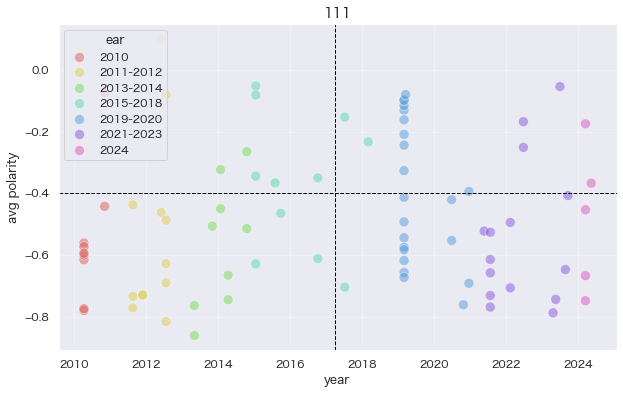

In [1438]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleandf_v, x='date', y='avg_polarity', hue='era', palette='hls', s=100, alpha=0.5)
plt.axhline(-0.4, color='black', linestyle='--', linewidth=1)
plt.axvline(cleandf['date'].mean(), color='black', linestyle='--', linewidth=1) 
plt.title('111', fontsize=14)
plt.xlabel('year')
plt.ylabel('avg polarity')
plt.legend(title='ear')
plt.grid(alpha=0.3)
plt.show()

## adj pre

In [920]:
t = Tokenizer()
pdresults_adj = []
for s in pre_debut_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    pdresults_adj.extend(result)
predebutCol_adj = collections.Counter(pdresults_adj)

In [926]:
df_pd_adj = pd.DataFrame.from_dict(predebutCol_adj, orient='index', columns=['頻度']).reset_index()
df_pd_adj.columns = ['形容詞', '頻度']
df_pd_adj = df_pd_adj.sort_values(by='頻度', ascending=False)
df_pd_adj = df_pd_adj[df_pd_adj['形容詞'].isin(adjfull['形容詞'])]
df_pd_adj.to_csv("predebut_adj.csv")

## adj maj

In [929]:
t = Tokenizer()
mdresults_adj = []
for s in majordebut_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    mdresults_adj.extend(result)
majordebutCol_adj = collections.Counter(mdresults_adj)

In [934]:
df_md_adj = pd.DataFrame.from_dict(majordebutCol_adj, orient='index', columns=['頻度']).reset_index()
df_md_adj.columns = ['形容詞', '頻度']
df_md_adj = df_md_adj.sort_values(by='頻度', ascending=False)
df_md_adj = df_md_adj[df_md_adj['形容詞'].isin(adjfull['adjective'])]
df_md_adj.to_csv("adjective folder/majordebut_adj.csv")

## adj fan

In [935]:
t = Tokenizer()
fanresults_adj = []
for s in fantasy_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    fanresults_adj.extend(result)
fantasyCol_adj = collections.Counter(fanresults_adj)

In [937]:
df_fan_adj = pd.DataFrame.from_dict(fantasyCol_adj, orient='index', columns = ['頻度']).reset_index()
df_fan_adj.columns = ['形容詞', '頻度']
df_fan_adj = df_fan_adj.sort_values(by='頻度', ascending=False)
df_fan_adj = df_fan_adj[df_fan_adj['形容詞'].isin(adjfull['adjective'])]
df_fan_adj.to_csv("adjective folder/fantasy_adj.csv")

## adj pop

In [938]:
#t = Tokenizer()
popresults_adj = []
for s in pop_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    popresults_adj.extend(result)
popCol_adj = collections.Counter(popresults_adj)
df_pop_adj = pd.DataFrame.from_dict(popCol_adj, orient='index', columns = ['頻度']).reset_index()
df_pop_adj.columns = ['形容詞', '頻度']
df_pop_adj = df_pop_adj.sort_values(by='頻度', ascending=False)
df_pop_adj = df_pop_adj[df_pop_adj['形容詞'].isin(adjfull['adjective'])]
df_pop_adj.to_csv("adjective folder/pop_adj.csv")

## adj pre2021

In [940]:
#pre2021_lyrics = pre2021['kashi'].tolist()
#t = Tokenizer()
p21results_adj = []
for s in pre2021_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    p21results_adj.extend(result)
pre21Col_adj = collections.Counter(p21results_adj)

In [942]:
df_pre21_adj = pd.DataFrame.from_dict(pre21Col_adj, orient='index', columns=['頻度']).reset_index()
df_pre21_adj.columns = ['形容詞', '頻度']
df_pre21_adj = df_pre21_adj.sort_values(by='頻度', ascending=False)
df_pre21_adj = df_pre21_adj[df_pre21_adj['形容詞'].isin(adjfull['adjective'])]
df_pre21_adj.to_csv("adjective folder/pre2021_adj.csv")

## adj iykyk

In [943]:
#iykyk_lyrics = iykyk['kashi'].tolist()
#t = Tokenizer()
iykresults_adj = []
for s in iykyk_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    iykresults_adj.extend(result)
iykCol_adj = collections.Counter(iykresults_adj)
df_iyk_adj = pd.DataFrame.from_dict(iykCol_adj, orient='index', columns=['頻度']).reset_index()
df_iyk_adj.columns = ['形容詞', '頻度']
df_iyk_adj = df_iyk_adj.sort_values(by='頻度', ascending=False)
df_iyk_adj = df_iyk_adj[df_iyk_adj['形容詞'].isin(adjfull['adjective'])]
df_iyk_adj.to_csv("adjective folder/iykyk_adj.csv")

## adj now

In [945]:
tk24results_adj = []
for s in tk24_lyrics: 
    result = [token.base_form for token in t.tokenize(s) if token.part_of_speech.split(',')[0] in ['形容詞']]
    tk24results_adj.extend(result)
tk24Col_adj = collections.Counter(tk24results_adj)
df_tk24_adj = pd.DataFrame.from_dict(tk24Col_adj, orient='index', columns=['頻度']).reset_index()
df_tk24_adj.columns = ['形容詞', '頻度']
df_tk24_adj = df_tk24_adj.sort_values(by='頻度', ascending=False)
df_tk24_adj = df_tk24_adj[df_tk24_adj['形容詞'].isin(adjfull['adjective'])]
df_tk24_adj.to_csv("adjective folder/tk24_adj.csv")

In [55]:
fulll = pd.read_csv("skowmsF_clean.csv")

In [545]:
pdcc = pdcc[pdcc['名詞'].isin(fulll['名詞'])]

In [59]:
pdccdata = pdcc.set_index('名詞').to_dict()['頻度']

In [516]:
pdmddata = pdmd.set_index('名詞').to_dict()['頻度']

In [464]:
cc2021data = cc2021.set_index('名詞').to_dict()['頻度']

In [503]:
iykdata = cciykk.set_index('名詞').to_dict()['頻度']

let's create a wordcloud with only pre-debut words...

In [72]:
from matplotlib.colors import LinearSegmentedColormap

custom_colors = ["#a7bed3","#c6e2e9","#f1ffc4","#ffcaaf","#dab894"]
custom_colormap = LinearSegmentedColormap.from_list("custom_colormap", custom_colors)

In [468]:
# FUKASE NOUNS ALL

wordcloud = WordCloud(background_color='white', colormap=custom_colormap,font_path = '/Users/kadomiii/Downloads/ipaexg.ttf', width=1500, height=1200, max_words=500).generate_from_frequencies(pdccdata)



In [521]:
wordcloud_majordebut = WordCloud(background_color='white', colormap = 'Set2',font_path = '/Users/kadomiii/Downloads/ipaexg.ttf', width=1500, height=1200, max_words=500).generate_from_frequencies(pdmddata)



In [469]:
wordcloud_pre2021 = WordCloud(background_color='white', colormap=custom_colormap,font_path = '/Users/kadomiii/Downloads/ipaexg.ttf', width=1500, height=1200, max_words=500).generate_from_frequencies(cc2021data)




In [518]:
wordcloud_iykyk = WordCloud(background_color='white', colormap=custom_colormap,font_path = '/Users/kadomiii/Downloads/ipaexg.ttf', width=1500, height=1200, max_words=500).generate_from_frequencies(iykdata)



i think it's time we dealt with the overabundance of you and me's.

In [577]:
cc2021 = cc2021[cc2021.名詞 != '僕']
cc2021

,名詞,頻度
58,人,31
16,何,26
1,私,21
285,貴方,19
22,時,17
...,...,...
359,あなた,1
392,自身,1
394,首,1
405,最近,1


In [807]:

df_tk24

,名詞,頻度
59,君,24
64,僕,22
8,場所,9
129,私,9
62,前,7
...,...,...
76,年,1
73,涙,1
70,眠気,1
69,大切,1


In [708]:
top_50_nouns = fulll.nlargest(50, '頻度')['名詞'].tolist()


In [825]:
top_25_nouns = fulll.nlargest(27, '頻度')['名詞'].tolist()

In [848]:
top_2nd_nouns = fulll.nlargest(52, '頻度').iloc[27:,]['名詞'].tolist()

In [1021]:
top_3rd_nouns = fulll.nlargest(77, '頻度').iloc[52:,]['名詞'].tolist()

In [587]:
master_top = fulll.nlargest(50, '頻度')['名詞'].tolist()
#master_top = pd.DataFrame(index=fulll['名詞'][:20])

In [688]:
master_top25 = fulll.nlargest(25, '頻度')['名詞'].tolist()


In [969]:
top_25_adjs = adjfull.nlargest(25, 'count')['adjective'].tolist()

In [970]:
top_2nd_adjs = adjfull.nlargest(50, 'count').iloc[25:,]['adjective'].tolist()

In [1004]:
top_3rd_adjs = adjfull.nlargest(75, 'count').iloc[50:,]['adjective'].tolist()

In [831]:
df_list = [df_pd, df_md, df_fan, df_pop, df_pre21, df_iyk, df_tk24]
eraFreq = {f'Era_{i+1}': [] for i in range(len(df_list))}
# ↑ dictionary to store the frequencies of each noun in each era
eraFreq
#df_list

for i, df in enumerate(df_list):
    matched_df = df[df['名詞'].isin(top_2nd_nouns)]
    # If the noun is in the top 50, extract its frequency; otherwise, fill with 0
    noun_freqs = matched_df.set_index('名詞')['頻度'].reindex(top_2nd_nouns, fill_value=0)
    # Store the frequency for each era
    eraFreq[f'Era_{i+1}'] = noun_freqs.tolist()

In [840]:
df_list = [df_pd, df_md, df_fan, df_pop, df_pre21, df_iyk, df_tk24]
eraFreq = {f'Era_{i+1}': [] for i in range(len(df_list))}
# ↑ dictionary to store the frequencies of each noun in each era
eraFreq
#df_list

for i, df in enumerate(df_list):
    matched_df2 = df[df['名詞'].isin(top_25_nouns)]
    noun_freqs2 = matched_df2.set_index('名詞')['頻度'].reindex(top_25_nouns, fill_value=0)
    eraFreq[f'Era_{i+1}'] = noun_freqs2.tolist()

In [849]:
for i, df in enumerate(df_list):
    matched_df3 = df[df['名詞'].isin(top_2nd_nouns)]
    noun_freqs3 = matched_df3.set_index('名詞')['頻度'].reindex(top_2nd_nouns, fill_value=0)
    eraFreq[f'Era_{i+1}'] = noun_freqs3.tolist()

In [1022]:


for i, df in enumerate(df_list):
    matched_df4 = df[df['名詞'].isin(top_3rd_nouns)]
    noun_freqs4 = matched_df4.set_index('名詞')['頻度'].reindex(top_3rd_nouns, fill_value=0)
    eraFreq[f'Era_{i+1}'] = noun_freqs4.tolist()
heatmap_3rd = pd.DataFrame(eraFreq, index=top_3rd_nouns)


In [841]:
heatmap_data2 = pd.DataFrame(eraFreq, index=top_25_nouns)
heatmap_data2 = heatmap_data2.drop(index = ['君','僕'])

In [850]:
heatmap_2nd = pd.DataFrame(eraFreq, index=top_2nd_nouns)

In [722]:
#heatmap_data2 = pd.DataFrame(eraFreq, index=top_25_nouns)
#heatmap_data2 = heatmap_data2.drop(index=['僕', '君'])

In [803]:
era_labels = ['2010', 
              '2011-2012', 
              '2013-2014', 
              '2015-2018', 
              '2019-2020', 
              '2021-2023',
              '2024']

In [1024]:
heatmap_3rd_transposed = heatmap_3rd.T

In [1025]:
global_min_raw = min(heatmap_data2_transposed.min().min(), heatmap_2nd_transposed.min().min(), heatmap_3rd_transposed.min().min())
global_max_raw = max(heatmap_data2_transposed.max().max(), heatmap_2nd_transposed.max().max(), heatmap_3rd_transposed.max().max())

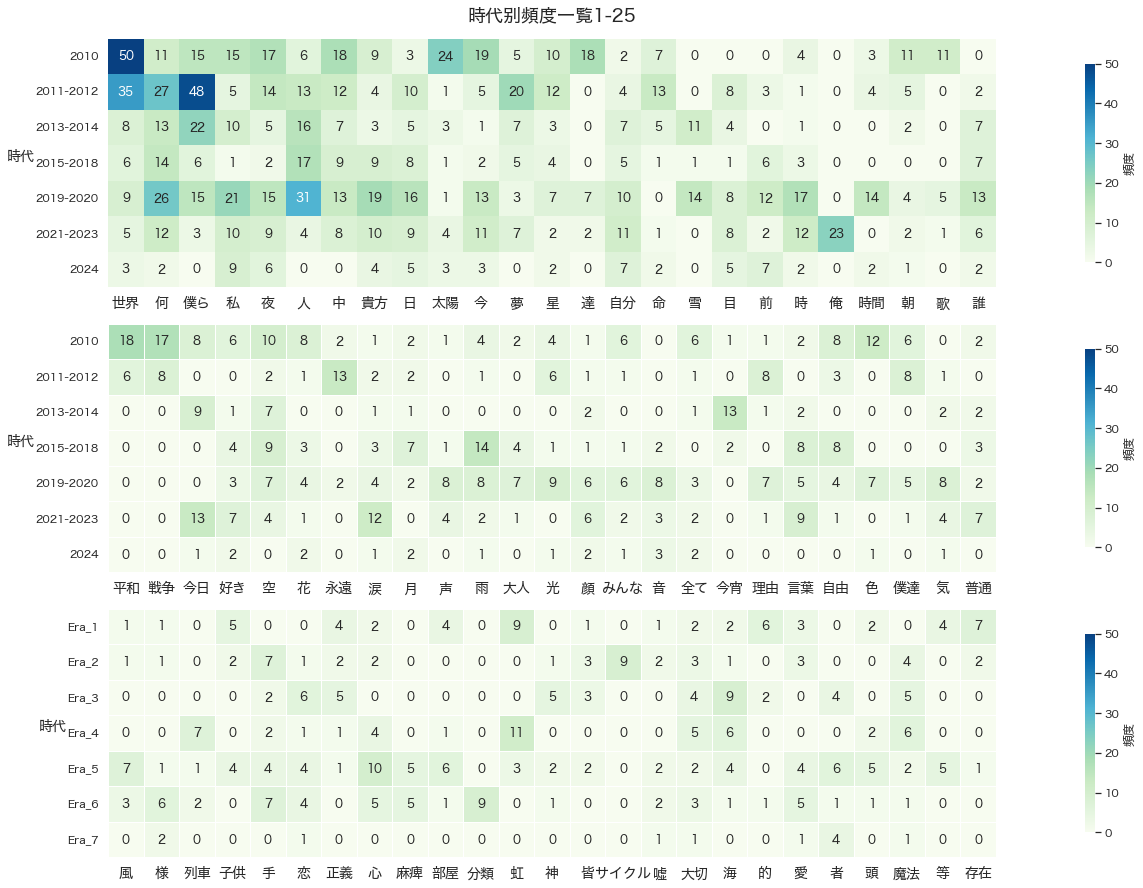

In [1029]:
plt.figure(figsize=(25, 12.5))
plt.subplot(3, 1, 1)
#the figure has 3 rows, 1 column, and this plot is the first plot.
heatmap_data2_transposed = heatmap_data2.T
ax = sns.heatmap(heatmap_data2_transposed, cmap='GnBu', annot=True, fmt="d", cbar_kws={'shrink': 0.8, 'label': '頻度'},square=True,vmin=global_min_raw,vmax=global_max_raw)

ax.set_yticklabels(era_labels, rotation = 0)
plt.xticks(rotation=0, fontsize = 14)

plt.title("時代别頻度一覧1-25", fontsize=18, pad = 18)
#plt.xlabel('Era', fontsize=14)
plt.ylabel('時代', fontsize=14, labelpad=14, rotation=0)

plt.subplot(3, 1, 2)
heatmap_2nd_transposed = heatmap_2nd.T
ax2 = sns.heatmap(heatmap_2nd_transposed, cmap='GnBu', annot=True, fmt="d", linewidths=.5, cbar_kws={'shrink': 0.8, 'label': '頻度'}, square=True,vmin=global_min_raw,vmax=global_max_raw)

ax2.set_yticklabels(era_labels, rotation = 0)
plt.xticks(rotation=0, fontsize = 14)
#plt.title("時代别頻度一覧26-50", fontsize=18, pad = 18)
#plt.xlabel('Era', fontsize=14)
plt.ylabel('時代', fontsize=14, labelpad=14, rotation=0)


plt.subplot(3, 1, 3)
ax3 = sns.heatmap(heatmap_3rd_transposed, cmap='GnBu', annot=True, fmt="d", linewidths=.5, cbar_kws={'shrink': 0.8, 'label': '頻度'}, square=True,vmin=global_min_raw,vmax=global_max_raw)

ax2.set_yticklabels(era_labels, rotation = 0)
plt.xticks(rotation=0, fontsize = 14)
#plt.title("時代别頻度一覧26-50", fontsize=18, pad = 18)
#plt.xlabel('Era', fontsize=14)
plt.ylabel('時代', fontsize=14, labelpad=14, rotation=0)

plt.subplots_adjust(hspace=0.3)



plt.tight_layout()
plt.show()

### due to the disproportionately large frequency of "you"s and "me"s, im going to remove them 

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/1818217972.py:5: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = pdmd_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)


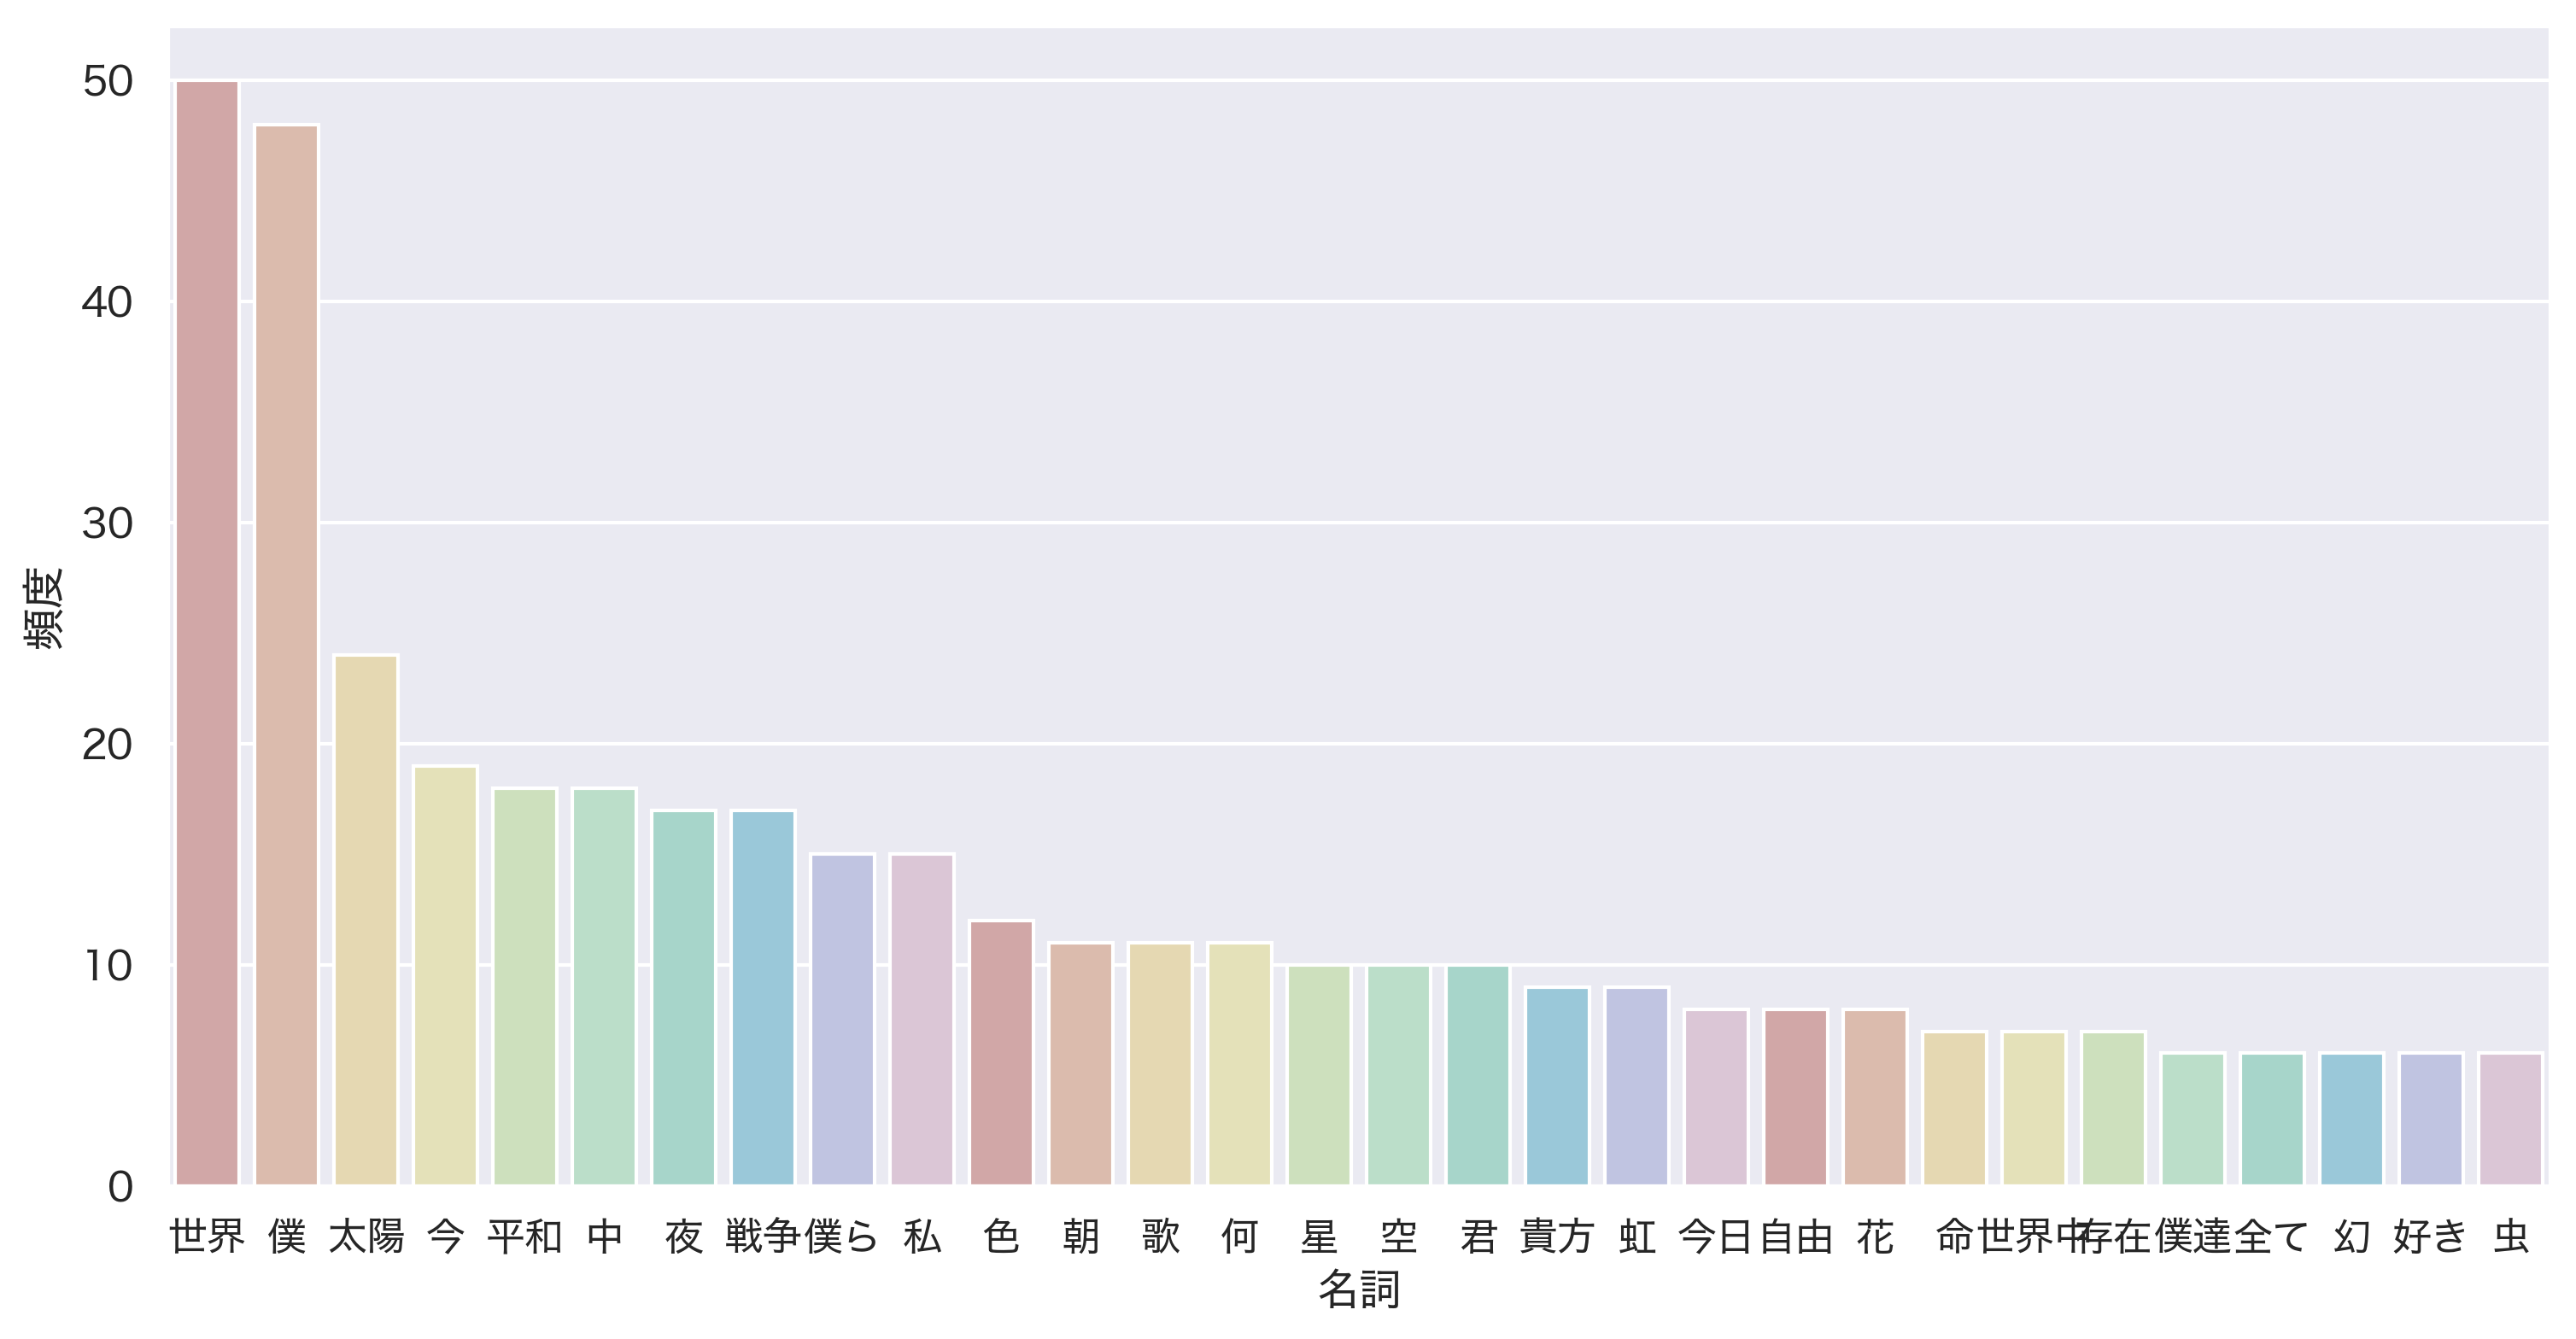

In [526]:
pdmd = pdmd.sort_values(by='頻度', ascending=False)
pdmd_graph = pdmd.iloc[0:30]
plt.figure(figsize=(12, 6), dpi=300)
sns.set(font='Hiragino Sans')
sns.barplot(data = pdmd_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)
#plt.xticks(rotation=20, fontsize=10)
plt.show()

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/2461188072.py:5: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = cc2021_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)


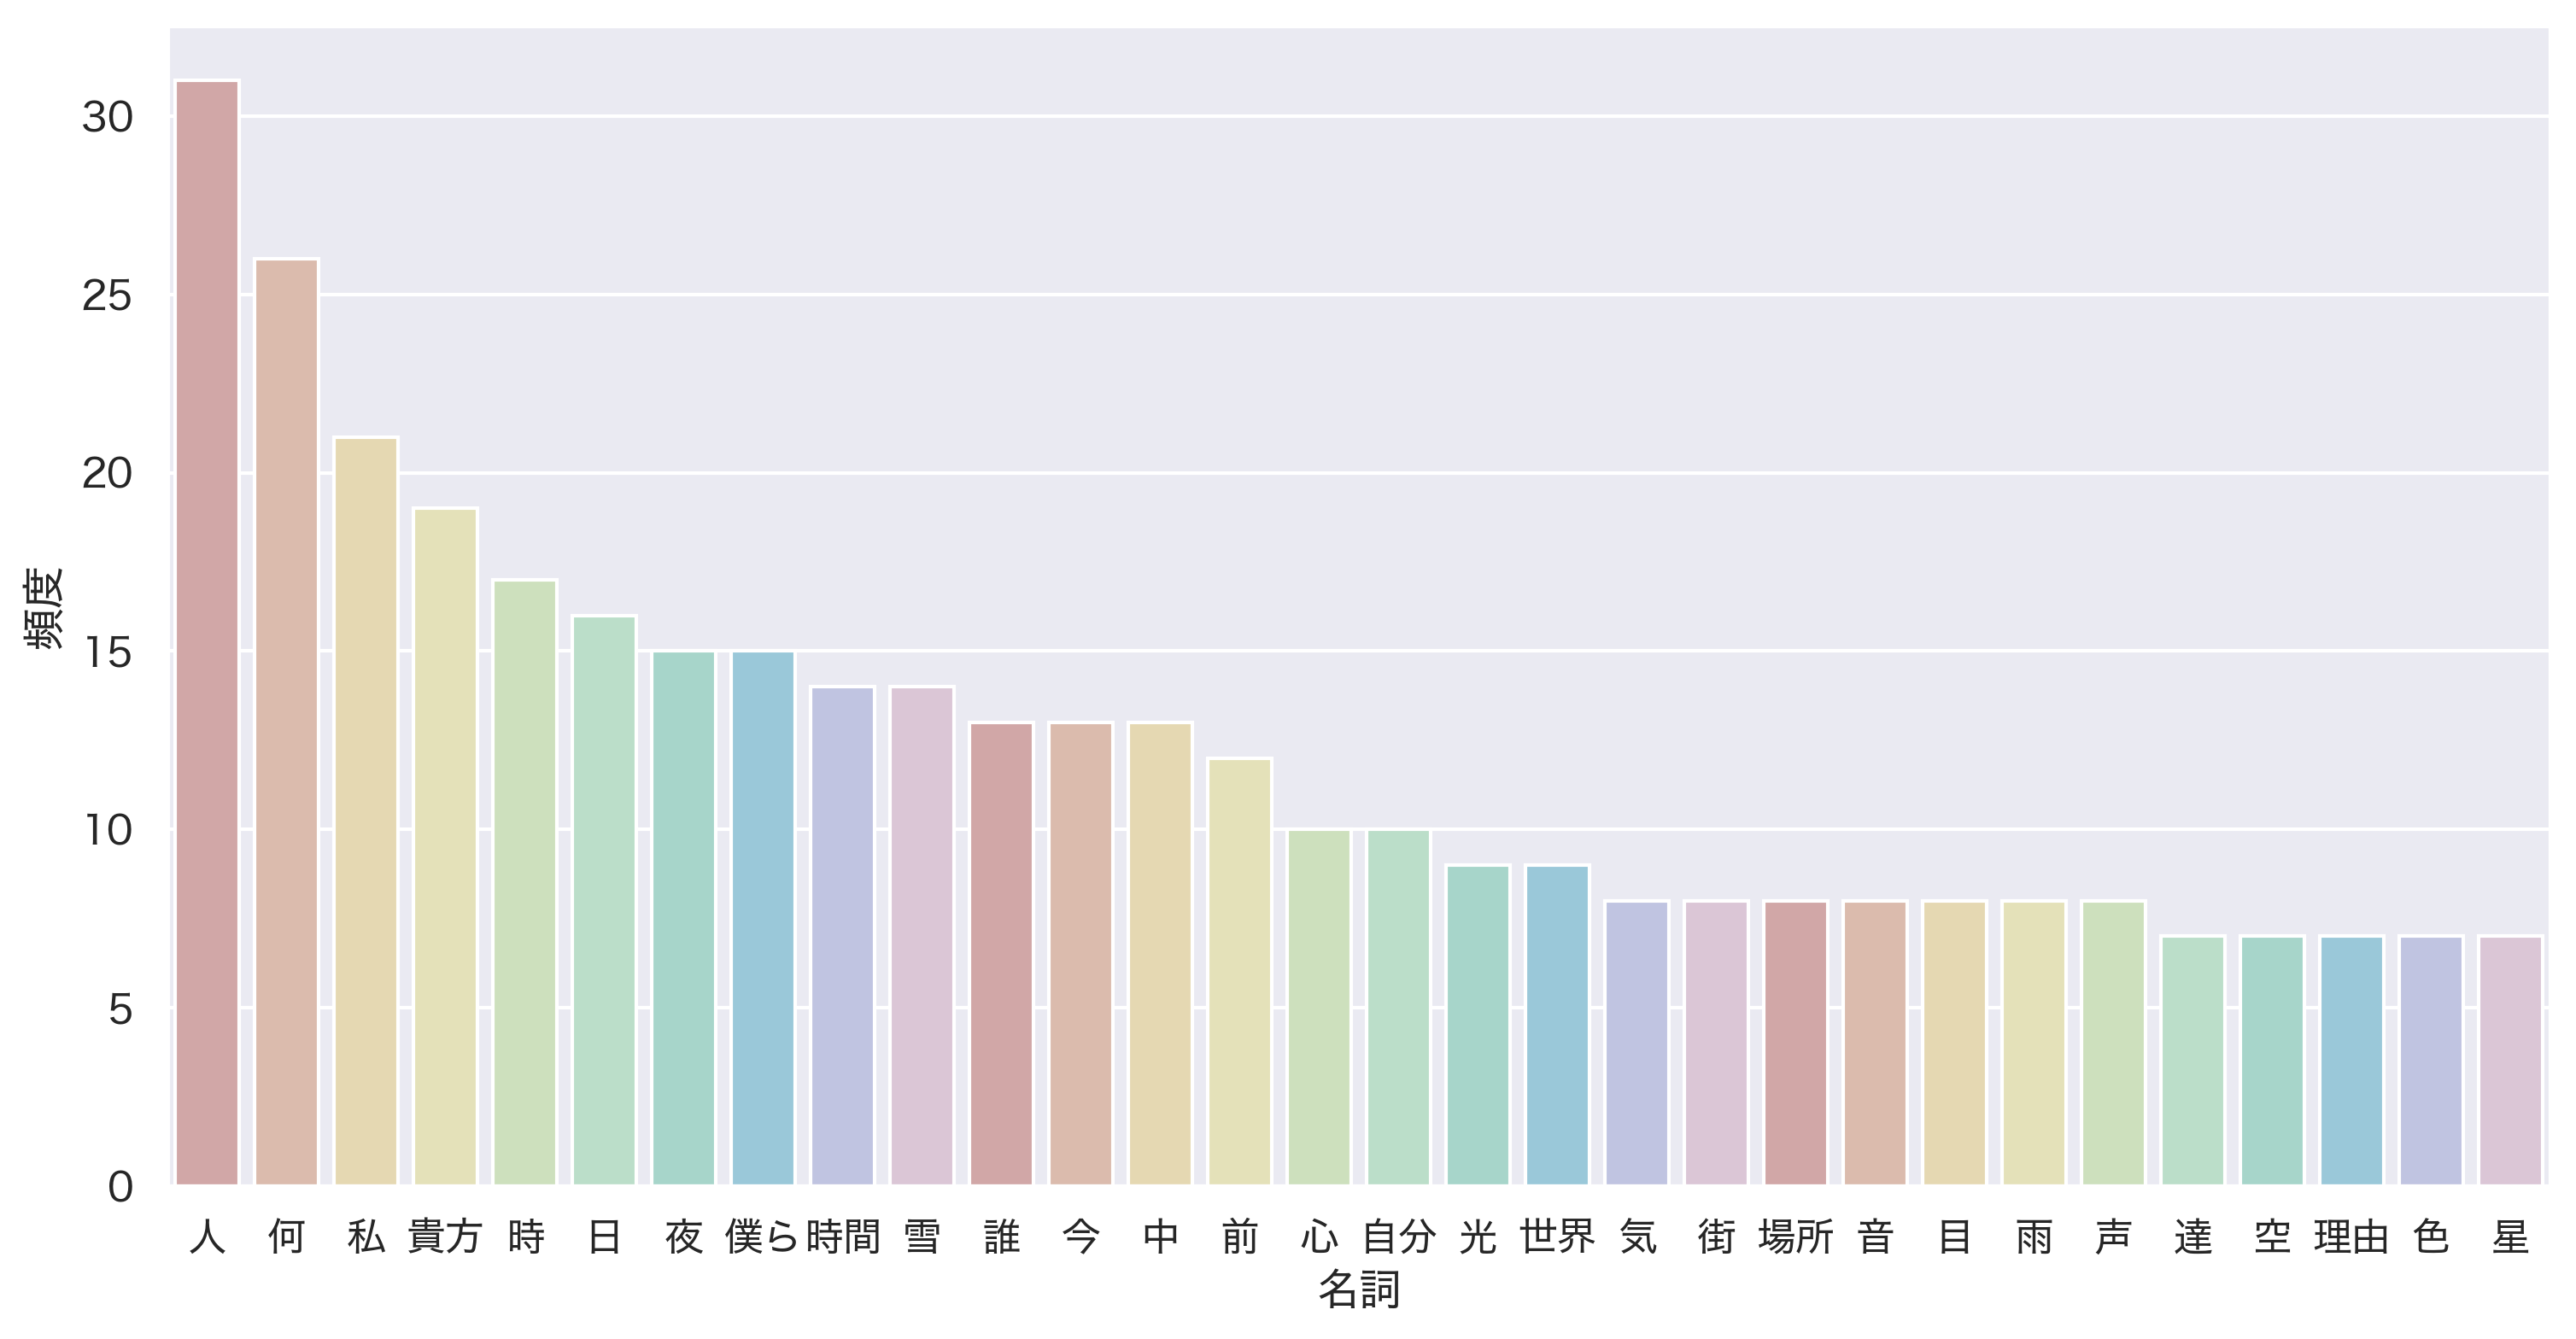

In [509]:
cc2021 = cc2021.sort_values(by='頻度', ascending=False)
cc2021_graph = cc2021.iloc[0:30]
plt.figure(figsize=(12, 6), dpi=300)
sns.set(font='Hiragino Sans')
sns.barplot(data = cc2021_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)
#plt.xticks(rotation=20, fontsize=10)
plt.show()

/var/folders/bm/yk1rnh6537gdy_kkrq7nfcs80000gn/T/ipykernel_6759/2114358641.py:5: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = cciykk_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)


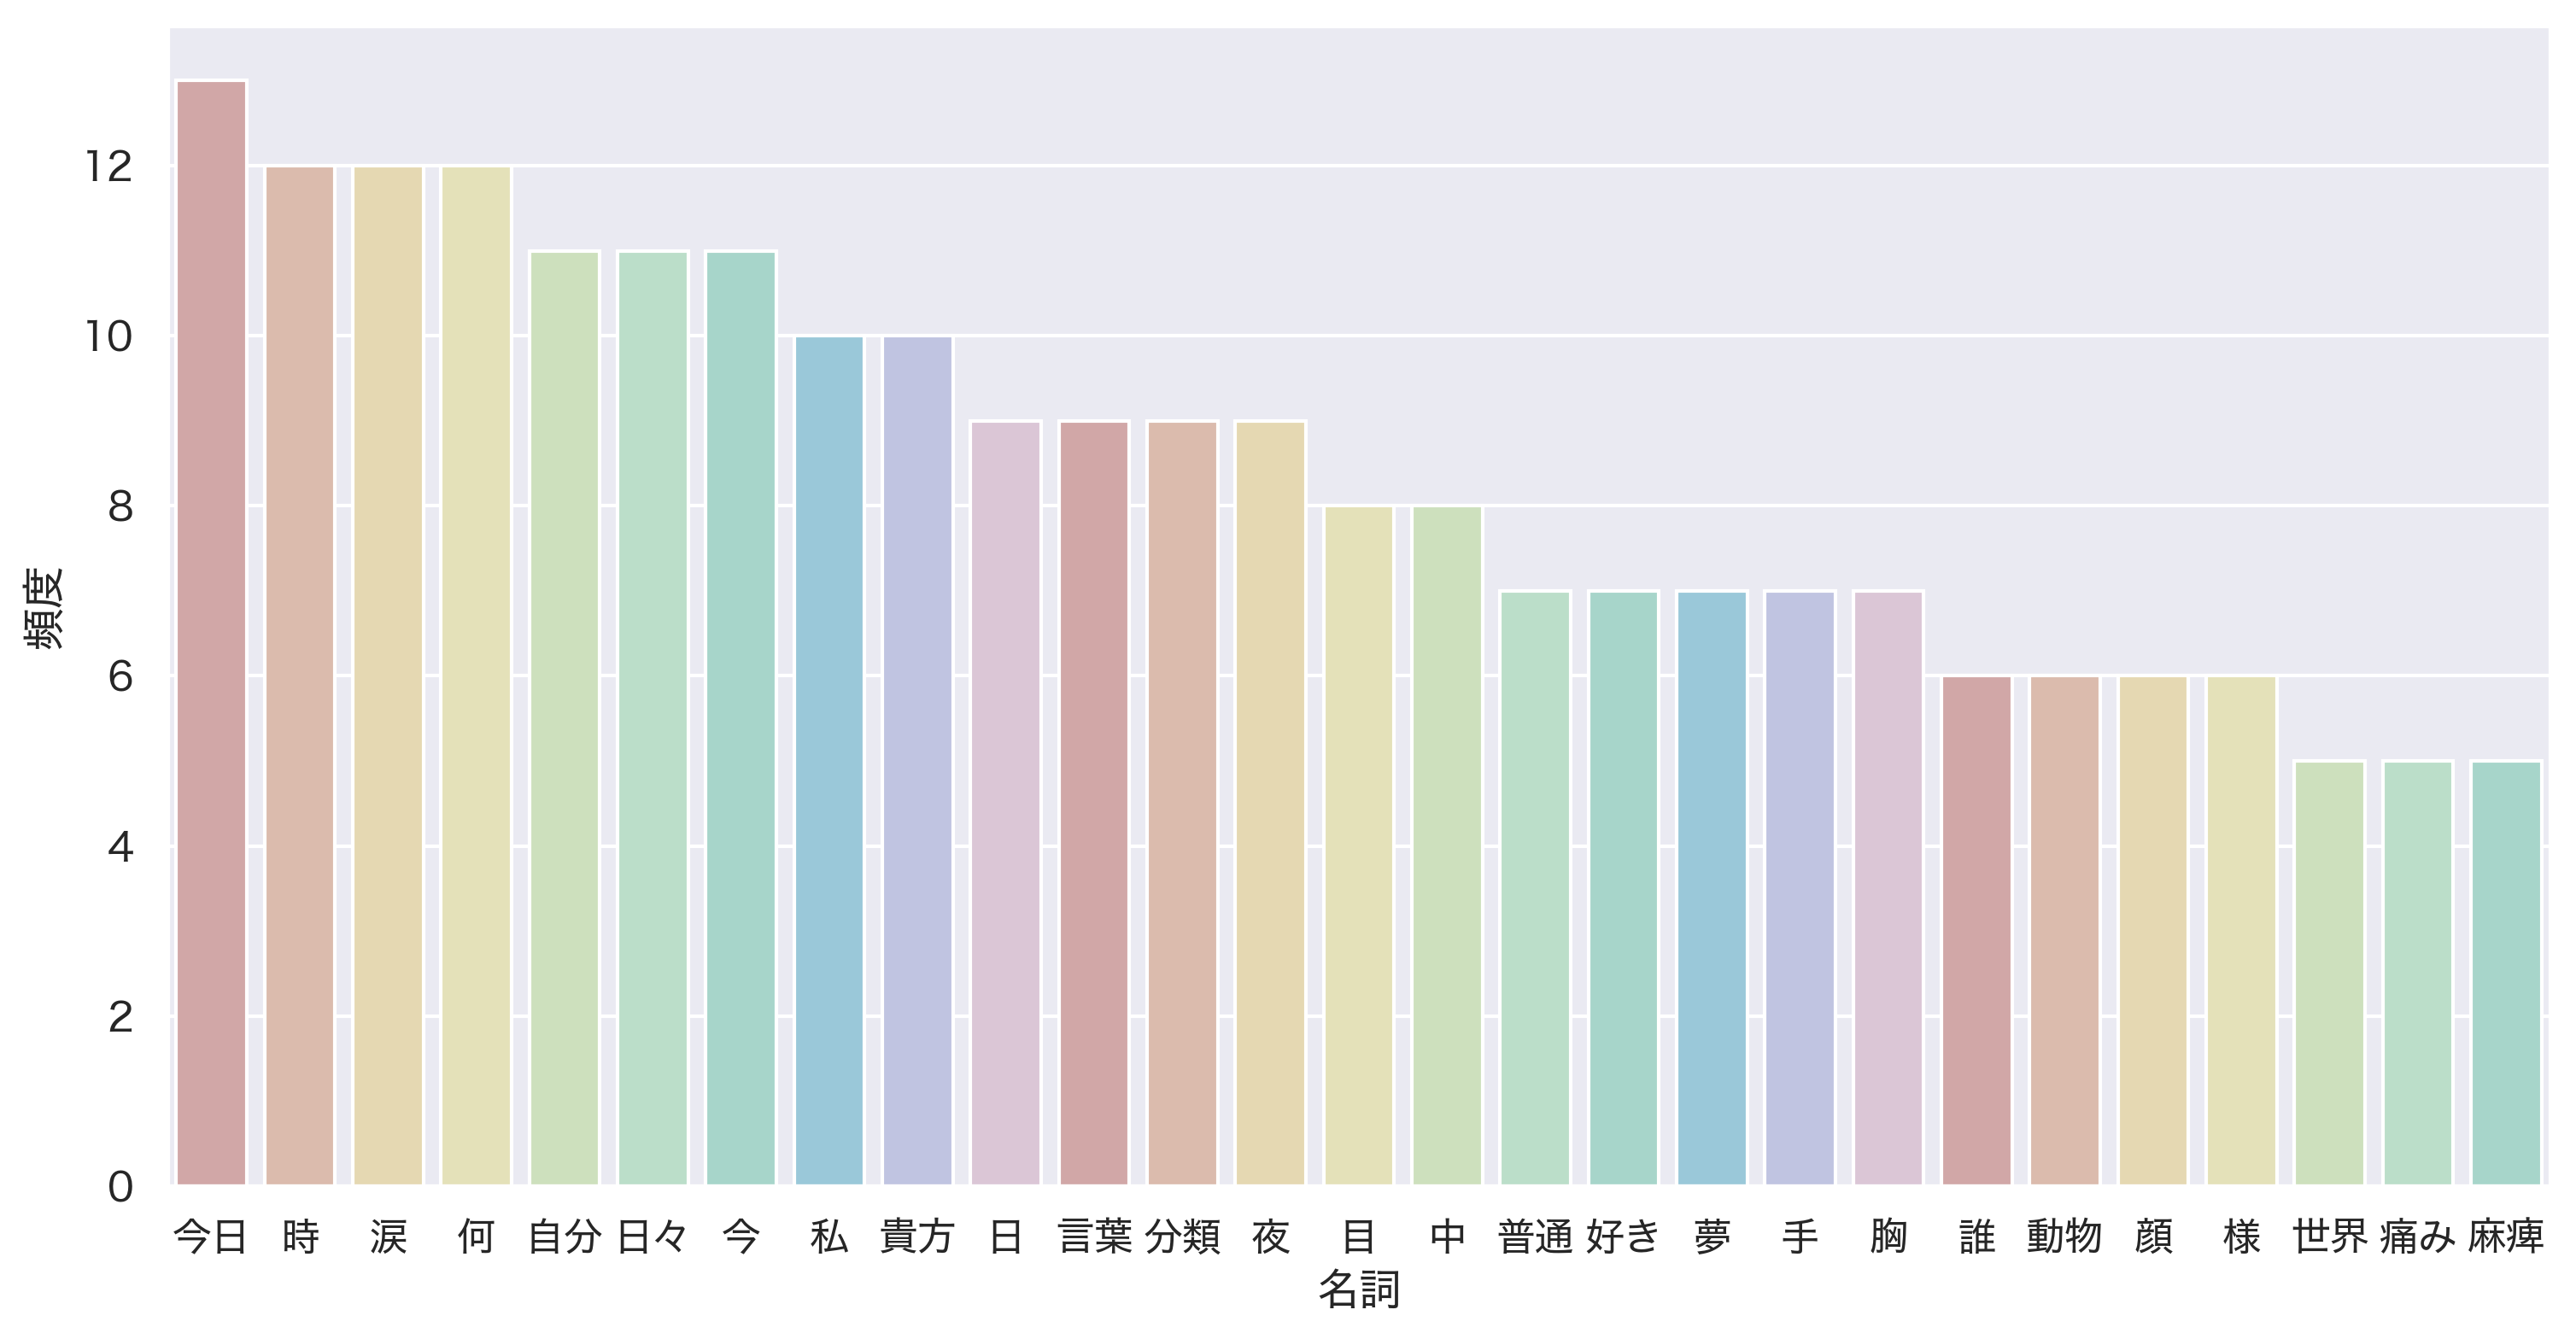

In [511]:
cciykk = cciykk.sort_values(by='頻度', ascending=False)
cciykk_graph = cciykk.iloc[3:30]
plt.figure(figsize=(12, 6), dpi=300)
sns.set(font='Hiragino Sans')
sns.barplot(data = cciykk_graph, x='名詞', hue = '名詞', y='頻度', palette=colors)
#plt.xticks(rotation=20, fontsize=10)
plt.show()

In [74]:
wordcloud.to_file('./pre_debut.png')

In [522]:
wordcloud_majordebut.to_file('./majordebut.png')

In [470]:
wordcloud_pre2021.to_file('./pre2021.png')

In [506]:
wordcloud_iykyk.to_file('./iykyk.png')

In [77]:
from matplotlib import rcParams

rcParams['font.family'] = 'Hiragino Sans'

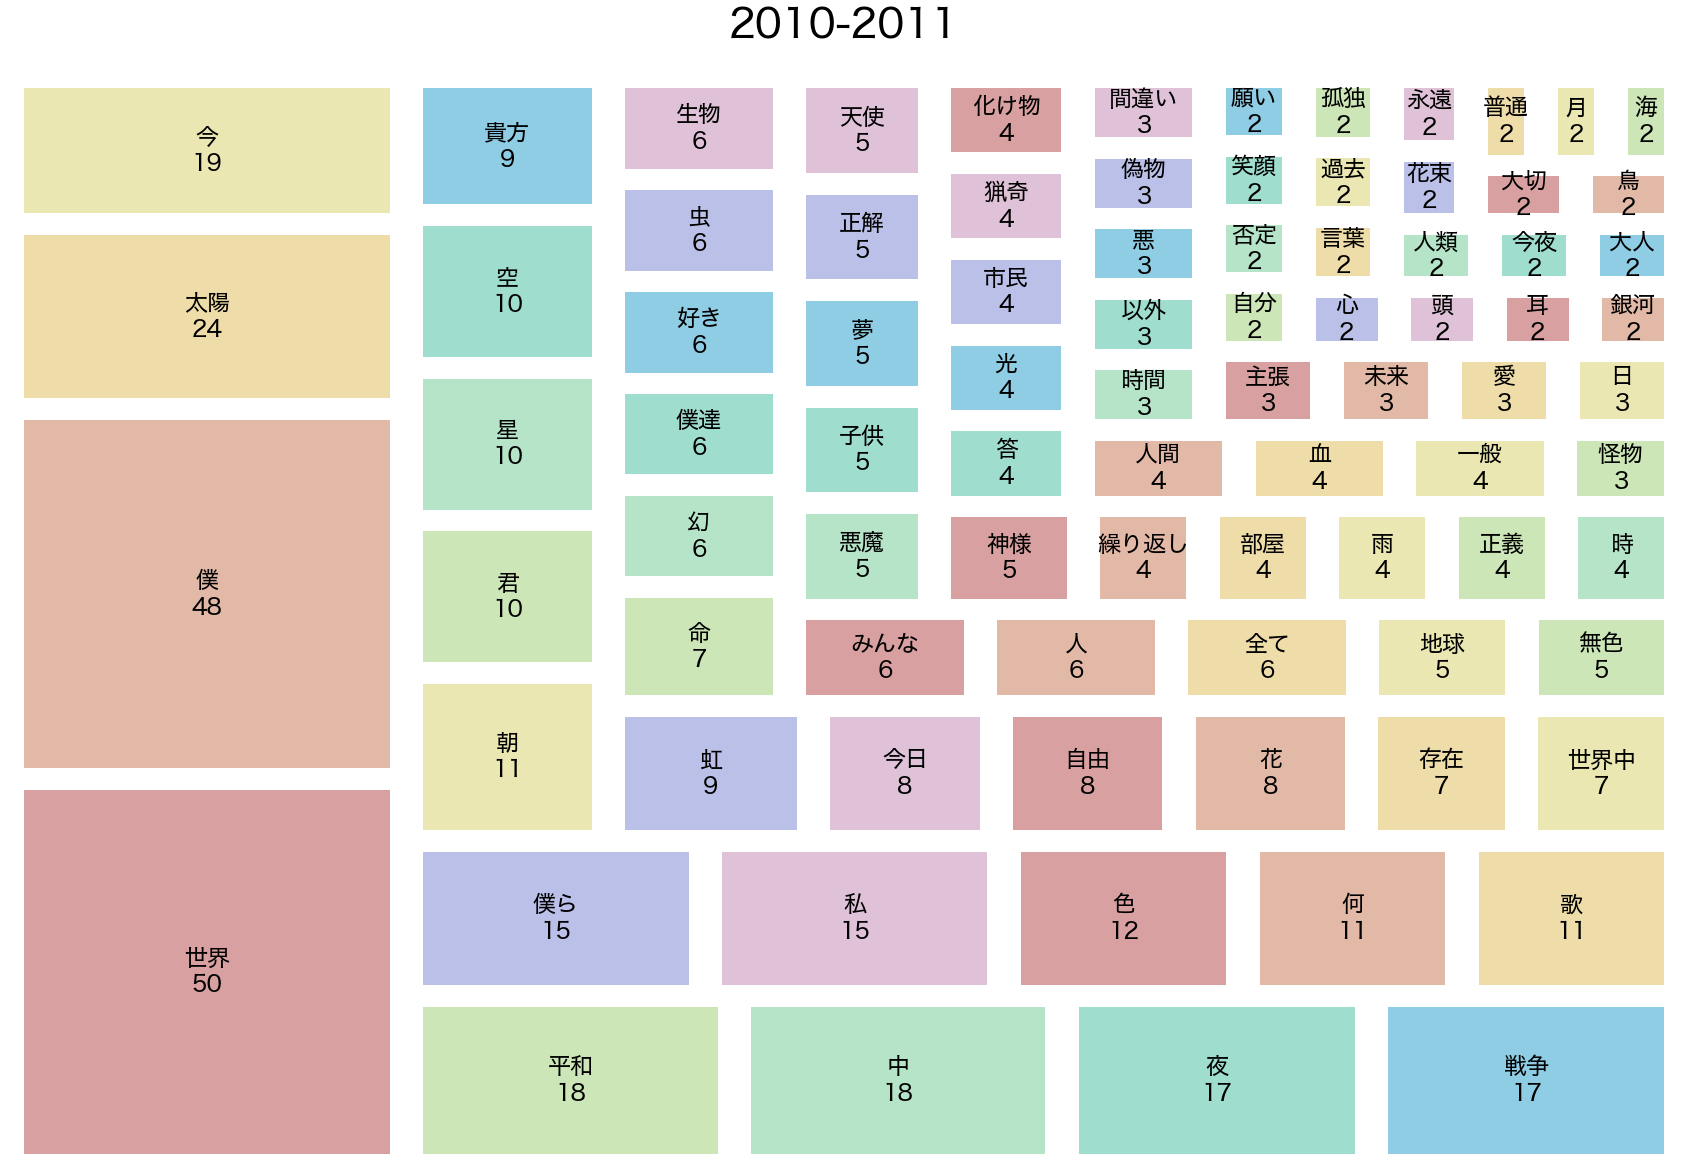

In [176]:
import squarify
#import matplotlib.pyplot as plt

df_sorted = pdcc[pdcc['頻度'] > 1].sort_values('頻度', ascending=False)

labels = [f"{word}\n{freq}" for word, freq in zip(df_sorted['名詞'], df_sorted['頻度'])]

plt.figure(figsize=(30, 20))
squarify.plot(
    sizes=df_sorted['頻度'], 
    label=labels,
    #label=df_sorted['名詞'], 
    color = colors,
    #color=plt.cm.Spectral(np.linspace(0, 1, len(df_sorted))),
    text_kwargs={'fontsize': 23},
    pad = 2
)

plt.axis('off')
plt.title("2010-2011", fontsize = 40, pad=40)
plt.show()

In [573]:
cciykk

,名詞,頻度
4,君,59
20,僕,30
276,俺,23
341,今日,13
109,時,12
...,...,...
504,専門,1
503,理由,1
502,倍,1
501,後,1


In [856]:
df_pd.head()

,名詞,頻度
62,世界,50
69,僕,48
46,太陽,24
144,今,19
181,平和,18


In [966]:
#songs_per_era = [9, 13, 9, 13, 25, 15, 5]
#era_dataframes = df_list = [df_pd, df_md, df_fan, df_pop, df_pre21, df_iyk, df_tk24]

# frequency standardization: nouns

In [949]:
songs_per_era = [9, 13, 9, 13, 25, 15, 5]
era_dataframes = df_list = [df_pd, df_md, df_fan, df_pop, df_pre21, df_iyk, df_tk24]

normalized_era_dataframes = []

for i, df in enumerate(era_dataframes):
    df_normalized = df.copy()
    df_normalized['標準頻度'] = df_normalized['頻度'] / songs_per_era[i]
    normalized_era_dataframes.append(df_normalized)

# Example: Check the normalized frequencies for pre2021
print(normalized_era_dataframes)

[         名詞  頻度  標準頻度
62       世界    50  5.555556
69         僕    48  5.333333
46       太陽    24  2.666667
144        今    19  2.111111
181      平和    18  2.000000
..        ...   ...       ...
211        風     1  0.111111
214    バトル     1  0.111111
218  ヒーロー     1  0.111111
220      運命     1  0.111111
336      ママ     1  0.111111

[171 rows x 3 columns],        名詞  頻度  標準頻度
22       僕    59  4.538462
17     僕ら    48  3.692308
24     世界    35  2.692308
102      君    29  2.230769
57       何    27  2.076923
..      ...   ...       ...
202    挫折     1  0.076923
201      謂     1  0.076923
199  コイツ     1  0.076923
1      午前     1  0.076923
456    争い     1  0.076923

[205 rows x 3 columns],          名詞  頻度  標準頻度
8          君    72  8.000000
56         僕    47  5.222222
0        僕ら    22  2.444444
53         人    16  1.777778
190      今宵    13  1.444444
..        ...   ...       ...
121      同志     1  0.111111
127      雪山     1  0.111111
128  オカルト     1  0.111111
129        類     1  0.111111


era_labels = ['2010', 
              '2011-2012', 
              '2013-2014', 
              '2015-2018', 
              '2019-2020', 
              '2021-2023',
              '2024']

In [1049]:
kimi_boku = {}

In [1071]:
pronouns = ['君','僕','俺','僕ら','僕達','私','お前','貴方','自分']

In [1165]:
timeL["kashi"] = timeL["kashi"].str.replace(r"\(.*?\)", "", regex=True)

In [1166]:
timeL

,name,kashi,date,lyricist,composer
0,青い太陽,"Our sun exists independently of all stars,and ...",2010/04/07,Fukase,Fukase・Nakajin
1,ANTI-HERO,You know I don't give a damn about what's“righ...,2015/07/29,Fukase・補作詞：Nelson Babin-Coy,Nakajin
2,umbrella,鏡に映る私は透明だった分かってた事でも知らないままの方が良かった私は君を濡らすこの忌々しい雨...,2020/06/24,Fukase,Fukase・Saori
3,アースチャイルド,僕らはEarth Child世界中を冒険飛行どこまでも行こうこの夜空に眠れない君を連れて夢を...,2013/05/01,Saori,Nakajin
4,RPG,空は青く澄み渡り 海を目指して歩く怖いものなんてない 僕らはもう一人じゃない大切な何かが壊れ...,2013/05/01,Saori・Fukase,Fukase
...,...,...,...,...,...
86,LOVE SONG,いつの時代もいるんだ「大人はいつも矛盾ばっかり」とか「嘘ばっかり」って言うKid今の君はどう...,2019/02/27,Fukase,Saori・Nakajin
87,Re:set,迎える朝 何度目の事真っ暗な部屋 子供達の声頭が鉛 体が鉄朦朧とする意識と記憶這いずり回るベ...,2019/02/27,Fukase,Fukase
88,RAIN,魔法は いつか解けると 僕らは知ってる月が咲いて太陽が今枯れた傘を差し出す君に映る僕は濡れて...,2017/07/05,Fukase・Saori,Nakajin・Fukase・Saori
89,ROBO,Ah 僕はまるで動かなくなったロボットみたいな目をしてるハートは錆びてしまったアームをだらん...,2023/08/22,Saori,Nakajin


In [1170]:
results = []

for _, row in timeL.iterrows():
    counts = {}
    for word in pronouns:
        counts[word] = row['kashi'].count(word)
    counts['name'] = row['name']
    counts['date'] = row['date']
    results.append(counts)

pronoun_counts = pd.DataFrame(results)

#pronoun_counts_df = pronoun_counts_df[['name'] + pronouns]
pronoun_counts = pronoun_counts[['name'] + pronouns + ['date']]

In [1171]:
pronoun_counts

,name,君,僕,俺,僕ら,僕達,私,お前,貴方,自分,date
0,青い太陽,0,8,0,1,5,0,0,0,0,2010/04/07
1,ANTI-HERO,0,0,0,0,0,0,0,0,0,2015/07/29
2,umbrella,4,0,0,0,0,8,0,0,2,2020/06/24
3,アースチャイルド,4,10,0,10,0,0,0,0,2,2013/05/01
4,RPG,4,13,0,9,0,0,0,0,1,2013/05/01
...,...,...,...,...,...,...,...,...,...,...,...
84,LOVE SONG,10,7,0,0,5,0,0,0,0,2019/02/27
85,Re:set,5,0,0,0,0,0,0,0,0,2019/02/27
86,RAIN,1,6,0,4,0,0,0,0,0,2017/07/05
87,ROBO,3,2,0,1,0,0,0,0,0,2023/08/22


In [1172]:
pronoun_sorted = pronoun_counts.sort_values(by='date')

In [1173]:
pronoun_sorted.drop('date', axis=1, inplace=True)

In [1163]:
lyrics_heiwa = timeL.loc[timeL['name'] == "世界平和", 'kashi'].values[0]

if "世界" in lyrics:
    print(f'The word exists in the kashi column of the song Blue Flower')
else:
    print(f'The word does not exist in the kashi column of the song Blue Flower')

The word exists in the kashi column of the song Blue Flower


In [1168]:
timeL.loc[timeL['name'] == "世界平和", 'kashi'].values[0]

'人間という怪物は「セカイ平和」という戦争を起こしてる平和なんて化け物は本当は存在していない普通に異常な貴方は「間違い」を主張して笑おうとする「正解」なんて化け物は本当は存在していない「セカイ」の中に花は入っていない「世界」の中に人は入っていないTHE WORLD PEACE WAR猟奇的な一般の市民は「世界」中で血の雨を降らし「セカイ」中で一つになってこういうんだ 「世界平和」猟奇的な一般の市民は「世界」中で血の雨を降らし「セカイ」中で一つになってこういうんだ 「世界平和」僕ら以外の生物は「世界平和」という戦争を起こしている自由なんて化け物は本当は存在していない普通に異常な僕らは「正解」を主張して謳おうとする「間違い」なんて化け物は本当は存在していない「セカイ」の中に虫は入っていない「世界」の中に僕は入っていないTHE WORLD PEACE WAR猟奇的な一般の市民は「世界」中で血の雨を降らし「セカイ」中で一つになってこういうんだ 「世界平和」猟奇的な一般の市民は「世界」中で血の雨を降らし「セカイ」中で一つになってこういうんだ 「世界平和」貴方たちが願う平和は世界平和じゃないんです花や虫や僕らの星は貴方たちに殺されてるんです「私たち世界人類に平和がありますように」世界中の子供たちに戦争のない未来を願いましょう「神様、人類を滅ぼして下さい」「神様、私たちの世界に平和を」'

In [1174]:
pronoun_sorted

,name,君,僕,俺,僕ら,僕達,私,お前,貴方,自分
0,青い太陽,0,8,0,1,5,0,0,0,0
48,白昼の夢,0,11,0,0,0,0,0,0,0
45,虹色の戦争,0,7,0,1,0,0,0,6,0
8,インスタントラジオ,0,0,0,0,0,0,0,0,0
70,幻の命,2,6,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
78,ユートピア,10,7,0,0,0,2,0,4,0
26,深海魚,0,0,0,0,0,0,0,0,5
34,タイムマシン,13,8,0,0,0,0,0,0,2
40,デッドエンド,0,7,0,0,0,0,0,0,0


In [1175]:
pronoun_sorted = pronoun_sorted.set_index('name')

In [1092]:
pronoun_transposed = pronoun_counts_df.T

In [1176]:
pronoun_sorted

,君,僕,俺,僕ら,僕達,私,お前,貴方,自分
name,,,,,,,,,
青い太陽,0,8,0,1,5,0,0,0,0
白昼の夢,0,11,0,0,0,0,0,0,0
虹色の戦争,0,7,0,1,0,0,0,6,0
インスタントラジオ,0,0,0,0,0,0,0,0,0
幻の命,2,6,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
ユートピア,10,7,0,0,0,2,0,4,0
深海魚,0,0,0,0,0,0,0,0,5
タイムマシン,13,8,0,0,0,0,0,0,2


In [1145]:
global_min_pronouns = pronoun_sorted.min().min()
global_max_pronouns = pronoun_sorted.max().max()


In [1186]:
import plotly.express as px


In [1189]:
np.bool = np.bool_


In [1194]:
# which songs are the most alike according to adjective usage

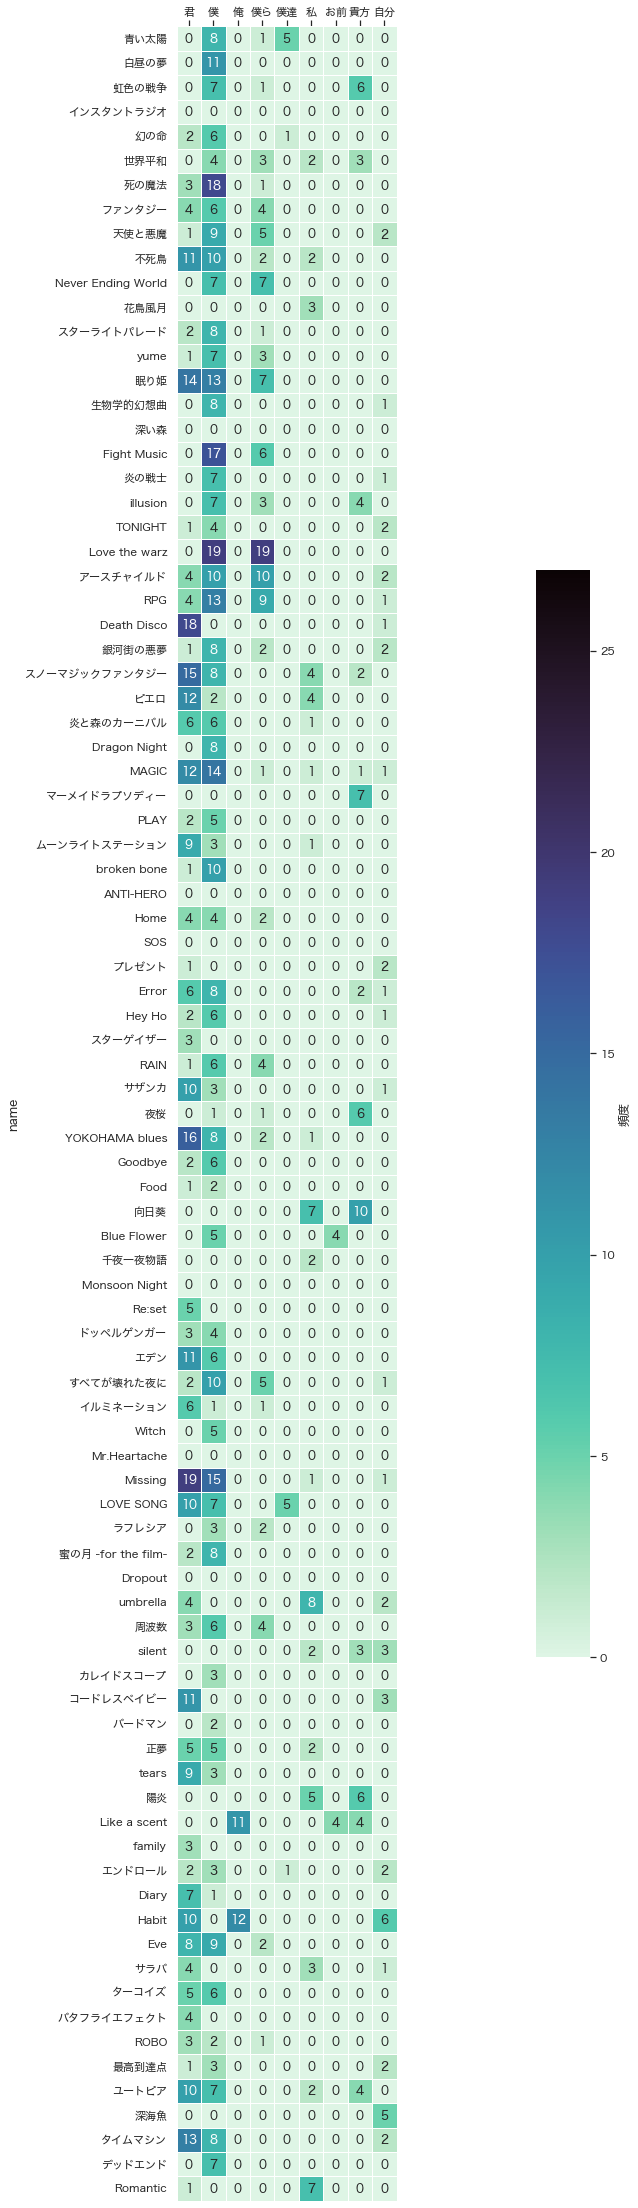

In [1177]:
plt.figure(figsize=(50, 40)) 
#plt.figure(dpi=30)
ax = sns.heatmap(
    pronoun_sorted,
    cmap='mako_r',
    annot=True,
    fmt=".0f",
    cbar_kws={'shrink': 0.5, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min_pronouns,
    vmax=global_max_pronouns
)
ax.xaxis.set_ticks_position('top')

In [1054]:
for era, df in zip(era_labels, normalized_era_dataframes):
    filtered_pronouns = df[df['名詞'].isin(pronouns)]
    kimi_boku[era] = filtered_pronouns.set_index('名詞')['標準頻度']

In [1055]:
kimi_boku

{'2010': 名詞
 僕      5.333333
 僕ら    1.666667
 私      1.666667
 君      1.111111
 貴方    1.000000
 僕達    0.666667
 自分    0.222222
 Name: 標準頻度, dtype: float64,
 '2011-2012': 名詞
 僕      4.538462
 僕ら    3.692308
 君      2.230769
 僕達    0.615385
 私      0.384615
 自分    0.307692
 貴方    0.307692
 Name: 標準頻度, dtype: float64,
 '2013-2014': 名詞
 君      8.000000
 僕      5.222222
 僕ら    2.444444
 私      1.111111
 自分    0.777778
 貴方    0.333333
 Name: 標準頻度, dtype: float64,
 '2015-2018': 名詞
 僕      3.000000
 君      2.846154
 貴方    0.692308
 僕ら    0.461538
 自分    0.384615
 私      0.076923
 Name: 標準頻度, dtype: float64,
 '2019-2020': 名詞
 君      3.68
 僕      2.96
 私      0.84
 貴方    0.76
 僕ら    0.60
 自分    0.40
 僕達    0.20
 お前    0.16
 Name: 標準頻度, dtype: float64,
 '2021-2023': 名詞
 君      3.933333
 僕      2.000000
 俺      1.533333
 自分    0.733333
 私      0.666667
 貴方    0.666667
 お前    0.266667
 僕ら    0.200000
 僕達    0.066667
 Name: 標準頻度, dtype: float64,
 '2024': 名詞
 君      4.8
 僕      4.4
 私      1.8
 自分   

In [1031]:
normalized_data = {}
normalized_data2 = {}
normalized_data3 = {}

for era, df in zip(era_labels, normalized_era_dataframes):
    filtered_df = df[df['名詞'].isin(top_25_nouns)]
    normalized_data[era] = filtered_df.set_index('名詞')['標準頻度']

heatmap_data_norm1 = pd.DataFrame(normalized_data, index=top_25_nouns).fillna(0)
heatmap_data_norm1 = heatmap_data_norm1.drop(index=['僕', '君'])
heatmap_dataUSE = heatmap_data_norm1.T

In [890]:

for era, df in zip(era_labels, normalized_era_dataframes):
    filtered_df = df[df['名詞'].isin(top_2nd_nouns)]
    normalized_data2[era] = filtered_df.set_index('名詞')['標準頻度']

heatmap_data_norm2 = pd.DataFrame(normalized_data2, index=top_2nd_nouns).fillna(0)
heatmap_dataUSE2 = heatmap_data_norm2.T

In [1032]:
for era, df in zip(era_labels, normalized_era_dataframes):
    filtered_df = df[df['名詞'].isin(top_3rd_nouns)]
    normalized_data3[era] = filtered_df.set_index('名詞')['標準頻度']

heatmap_data_norm3 = pd.DataFrame(normalized_data3, index=top_3rd_nouns).fillna(0)
heatmap_dataUSE3 = heatmap_data_norm3.T

In [1033]:
global_min = min(heatmap_dataUSE.min().min(), heatmap_dataUSE2.min().min(), heatmap_dataUSE3.min().min())
global_max = max(heatmap_dataUSE.max().max(), heatmap_dataUSE2.max().max(), heatmap_dataUSE3.max().max())


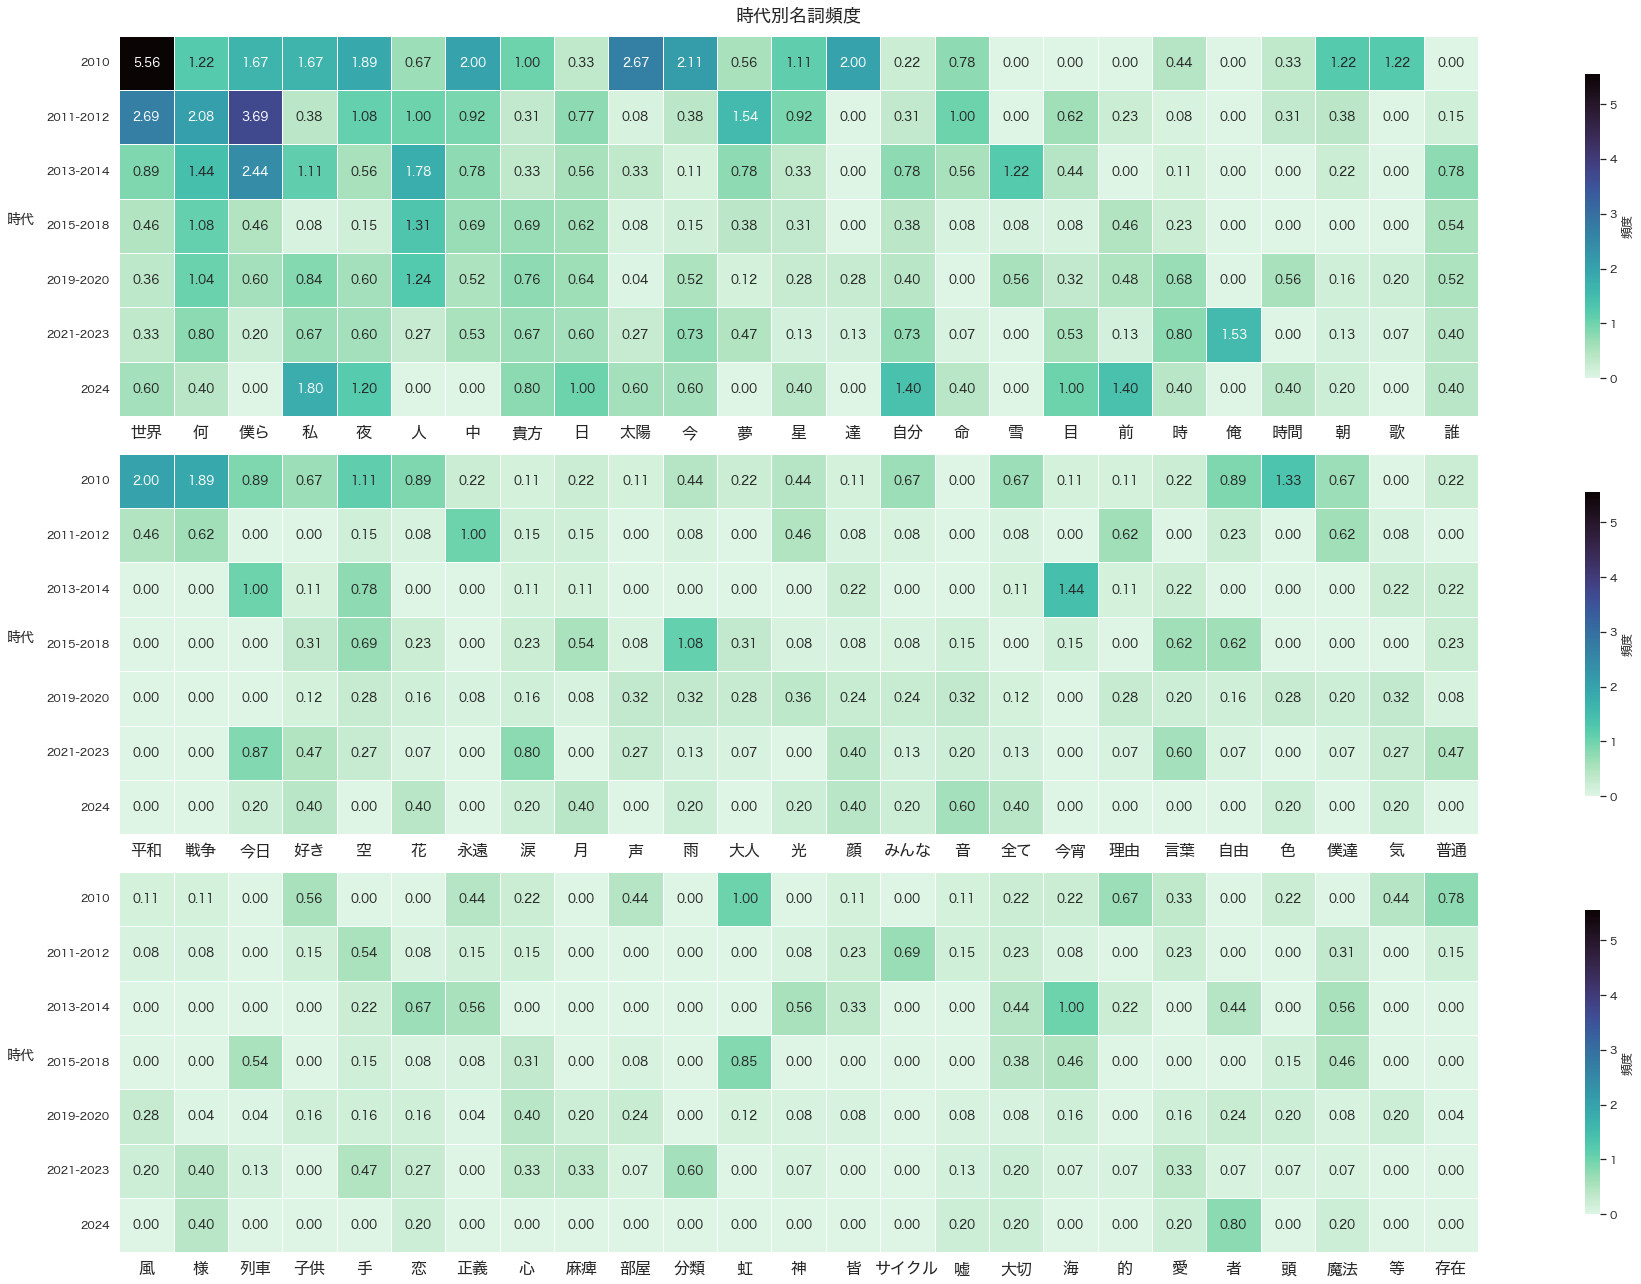

In [1046]:
plt.figure(figsize=(30, 18)) 
plt.subplot(3, 1, 1)
sns.heatmap(
    heatmap_dataUSE,
    cmap='mako_r',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min,
    vmax=global_max
)
plt.title('時代別名詞頻度', fontsize=18, pad=15)

plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0)


plt.subplot(3, 1, 2)
sns.heatmap(
    heatmap_dataUSE2,
    cmap='mako_r',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min,
    vmax=global_max 
)
plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0)

plt.subplot(3, 1, 3)
sns.heatmap(
    heatmap_dataUSE3,
    cmap='mako_r',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min,
    vmax=global_max 
)

#plt.title('時代別名詞頻度', fontsize=18, pad=15)
#plt.xlabel('時代', fontsize=14)
plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0)


#plt.subplots_adjust(hspace=2) 
plt.show()


In [947]:
df_list_adj = [df_pd_adj, df_md_adj, df_fan_adj, df_pop_adj, df_pre21_adj, df_iyk_adj, df_tk24_adj]

In [978]:
normalized_era_dataframes_adj = []

for i, df in enumerate(df_list_adj):
    
    df_normalized = df.copy()
    df_normalized['標準頻度'] = df_normalized['頻度'] / songs_per_era[i]
    normalized_era_dataframes_adj.append(df_normalized)

print(normalized_era_dataframes_adj)

[    形容詞  頻度  標準頻度
0     青い     7  0.777778
9   正しい     5  0.555556
13    白い     4  0.444444
3   寂しい     3  0.333333
5   楽しい     3  0.333333
14    蒼い     3  0.333333
1     赤い     1  0.111111
2     眠い     1  0.111111
4     良い     1  0.111111
7     辛い     1  0.111111
10    深い     1  0.111111
11    暗い     1  0.111111,     形容詞  頻度  標準頻度
14  欲しい    13  1.000000
5   美しい    13  1.000000
7     強い     4  0.307692
9     怖い     4  0.307692
3     長い     3  0.230769
1   悲しい     3  0.230769
11    深い     3  0.230769
17    無い     2  0.153846
8   愛しい     2  0.153846
18  小さい     1  0.076923
16    醜い     1  0.076923
10    儚い     1  0.076923
13  上手い     1  0.076923
12  嬉しい     1  0.076923
6   明るい     1  0.076923
19  苦しい     1  0.076923,         形容詞  頻度  標準頻度
17      危ない     9  1.000000
3         青い     7  0.777778
4         怖い     7  0.777778
18      欲しい     4  0.444444
13        良い     3  0.333333
15      悲しい     3  0.333333
2         広い     2  0.222222
7         無い     2  0.222222
8         早い     2  0.

In [980]:
era_labels

['2010',
 '2011-2012',
 '2013-2014',
 '2015-2018',
 '2019-2020',
 '2021-2023',
 '2024']

In [1007]:
normalized_data_adj = {}
normalized_data2_adj = {}
normalized_data3_adj = {}

for era, df in zip(era_labels, normalized_era_dataframes_adj):
    filtered_df_adj = df[df['形容詞'].isin(top_25_adjs)]
    normalized_data_adj[era] = filtered_df_adj.set_index('形容詞')['標準頻度']

heatmap_data_norm1_adj = pd.DataFrame(normalized_data_adj, index=top_25_adjs).fillna(0)
#heatmap_data_norm1 = heatmap_data_norm1.drop(index=['僕', '君'])
heatmap_dataUSE_adj = heatmap_data_norm1_adj.T


for era, df in zip(era_labels, normalized_era_dataframes_adj):
    filtered_df_adj = df[df['形容詞'].isin(top_2nd_adjs)]
    normalized_data2_adj[era] = filtered_df_adj.set_index('形容詞')['標準頻度']

heatmap_data_norm2_adj = pd.DataFrame(normalized_data2_adj, index=top_2nd_adjs).fillna(0)
heatmap_dataUSE2_adj = heatmap_data_norm2_adj.T


for era, df in zip(era_labels, normalized_era_dataframes_adj):
    filtered_df_adj = df[df['形容詞'].isin(top_3rd_adjs)]
    normalized_data3_adj[era] = filtered_df_adj.set_index('形容詞')['標準頻度']

heatmap_data_norm3_adj = pd.DataFrame(normalized_data3_adj, index=top_3rd_adjs).fillna(0)
heatmap_dataUSE3_adj = heatmap_data_norm3_adj.T

In [1008]:
global_min_adj = min(heatmap_dataUSE_adj.min().min(), heatmap_dataUSE2_adj.min().min(), heatmap_dataUSE3_adj.min().min())
global_max_adj = max(heatmap_dataUSE_adj.max().max(), heatmap_dataUSE2_adj.max().max(), heatmap_dataUSE3_adj.max().max())


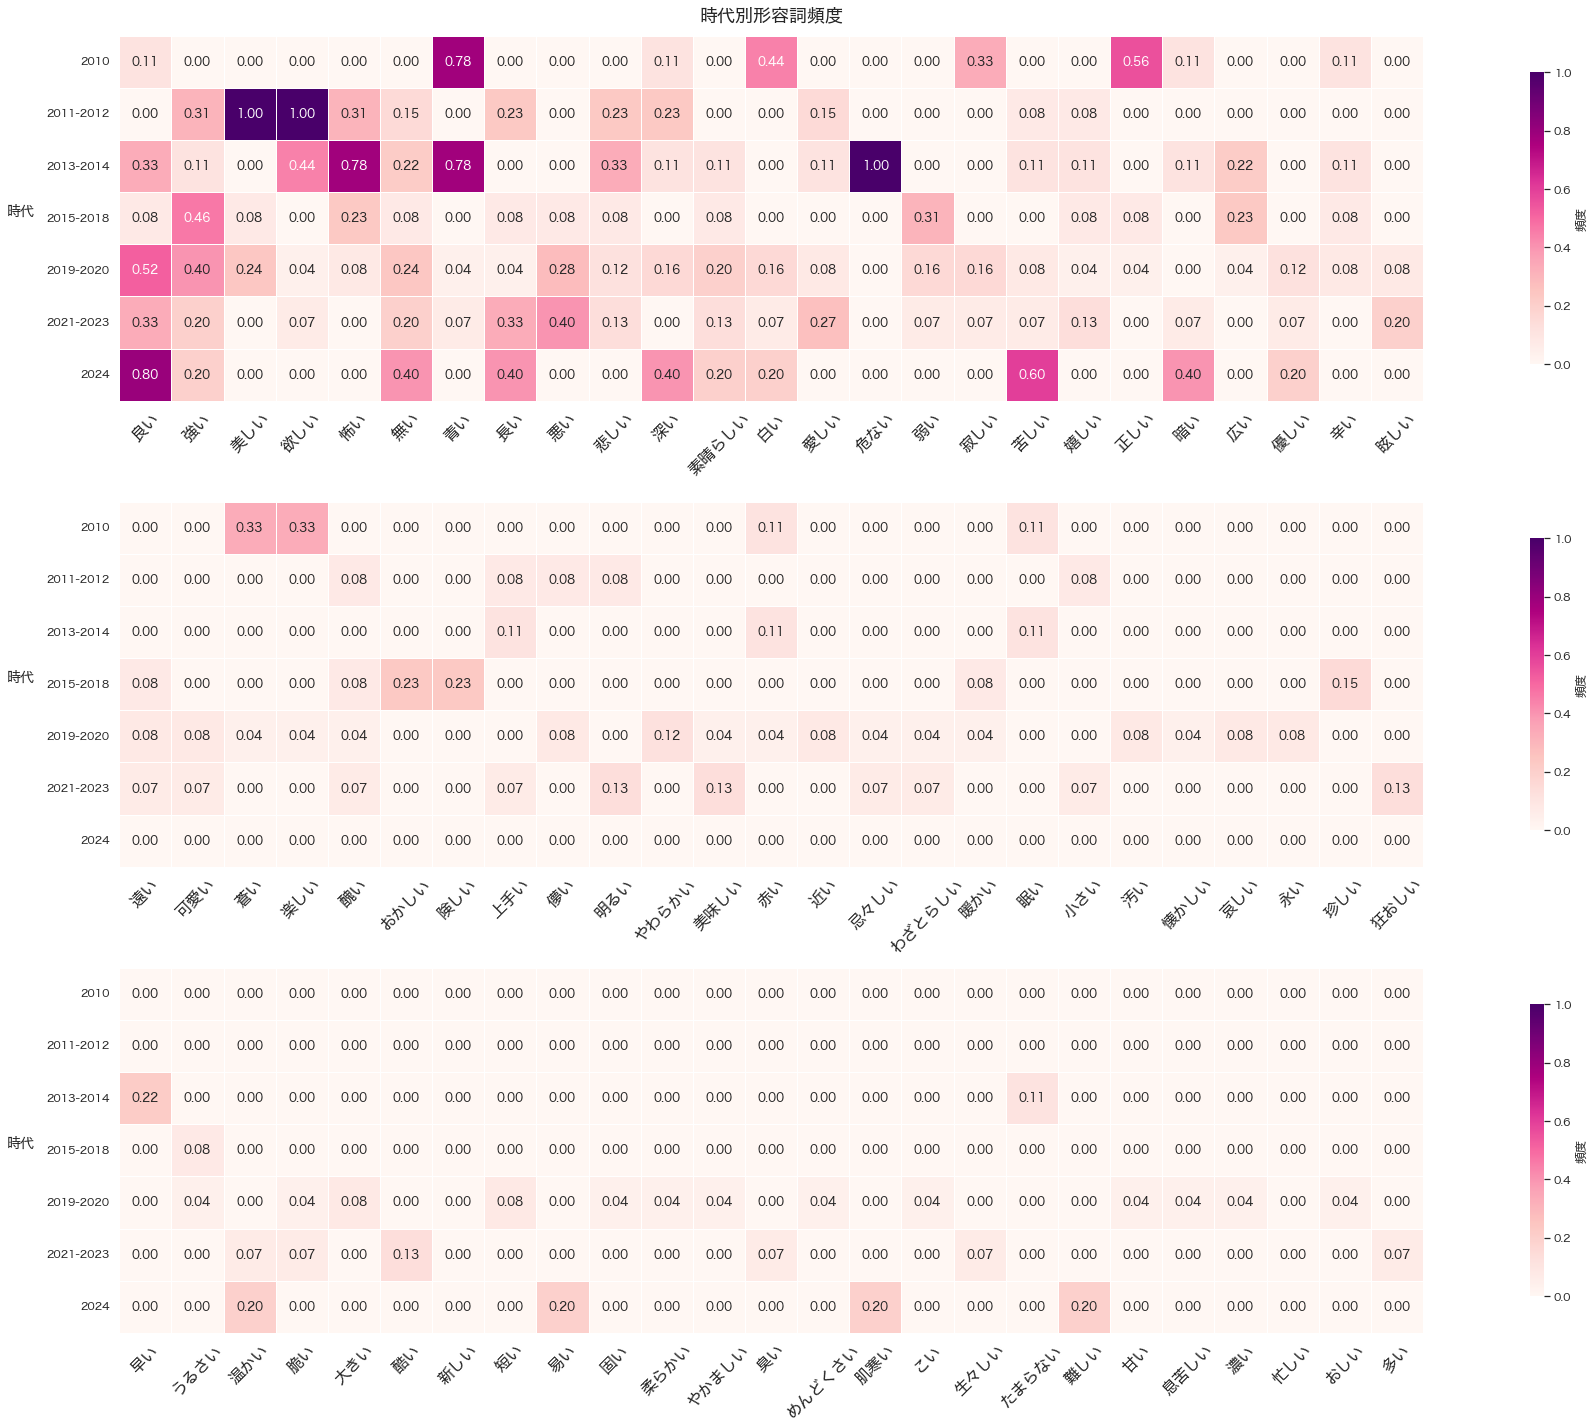

In [1020]:
plt.figure(figsize=(30,20)) 
plt.subplot(3, 1, 1)
sns.heatmap(
    heatmap_dataUSE_adj,
    cmap='RdPu',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min_adj,
    vmax=global_max_adj
)
plt.title('時代別形容詞頻度', fontsize=18, pad=15)

plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=0)


plt.subplot(3, 1, 2)
sns.heatmap(
    heatmap_dataUSE2_adj,
    cmap='RdPu',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min_adj,
    vmax=global_max_adj 
)

plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=0)

plt.subplot(3, 1, 3)
sns.heatmap(
    heatmap_dataUSE3_adj,
    cmap='RdPu',
    annot=True,
    fmt=".2f",
    cbar_kws={'shrink': 0.8, 'label': '頻度'},
    linewidths=0.5,
    square=True,
    vmin=global_min_adj,
    vmax=global_max_adj 
)


#plt.title('時代別名詞頻度', fontsize=18, pad=15)
#plt.xlabel('時代', fontsize=14)
plt.ylabel('時代', fontsize=14, labelpad=25, rotation=0)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# emotional polarity analysis
- most "positive" and most "negative" song of each era
- average emotional polarity points during each era
    - match each era's dataframe to the polarity database
    - calulate the average points for each
- (use interactive plotly graph) plot all songs based on positivity / negativity

# unique noun analysis

In [793]:
tk24Col = collections.Counter()

# Process each lyric row
for s in tk24_lyrics:
    unique_nouns = set()
    for token in t.tokenize(s):
        if token.part_of_speech.split(',')[0] == '名詞':
            unique_nouns.add(token.base_form)
    tk24Col.update(unique_nouns)

# Print the result
print(tk24Col)

Counter({'の': 5, 'よう': 4, 'それ': 4, 'ん': 4, 'まま': 4, '事': 3, '目': 3, '日': 3, '世界': 3, '君': 3, '前': 3, '僕': 3, '自分': 2, 'ここ': 2, '場所': 2, '夜': 2, '顔': 2, '様': 2, '幸せ': 2, '道': 2, '上': 2, '誰': 2, '好き': 2, '度': 2, '瞬間': 2, '今': 2, '何': 2, '先': 2, '逆': 2, '太陽': 2, 'みたい': 2, '人生': 2, '音': 2, '本当': 2, '私': 2, 'どこ': 1, '選択肢': 1, '海底': 1, '闇': 1, 'シリウス': 1, '者': 1, '牙': 1, '今日': 1, 'ライト': 1, 'アイツ': 1, '紺碧': 1, 'ホンモノ': 1, 'ごめん': 1, 'やつ': 1, '波': 1, '命': 1, '進路': 1, '捕食': 1, 'ベイトボール': 1, 'こと': 1, '確か': 1, '退化': 1, '暗闇': 1, '息': 1, '為': 1, '勇気': 1, '連続': 1, '深淵': 1, 'ロマンティック': 1, '星': 1, '真っ白': 1, '群れ': 1, '喧騒': 1, '嵐': 1, '口': 1, '泡沫': 1, '静か': 1, '偽物': 1, '化け物': 1, '誇り': 1, '真っ暗': 1, 'ら': 1, '強者': 1, '一番': 1, '新種': 1, 'タイム': 1, '眠気': 1, '涙': 1, '他': 1, 'これ': 1, '3': 1, '年': 1, 'ため': 1, '記憶': 1, 'マシン': 1, 'チクタクチクタク': 1, '道端': 1, '大切': 1, '花': 1, '時間': 1, '大発見': 1, '気': 1, '全て': 1, 'くせ': 1, '光': 1, 'がむしゃら': 1, '夜空': 1, '距離': 1, '花びら': 1, 'もの': 1, '路頭': 1, 'そっち': 1, '何もかも': 1, '景色': 1, 'クタクタ': 1, '

In [1455]:
len(testlist)

37

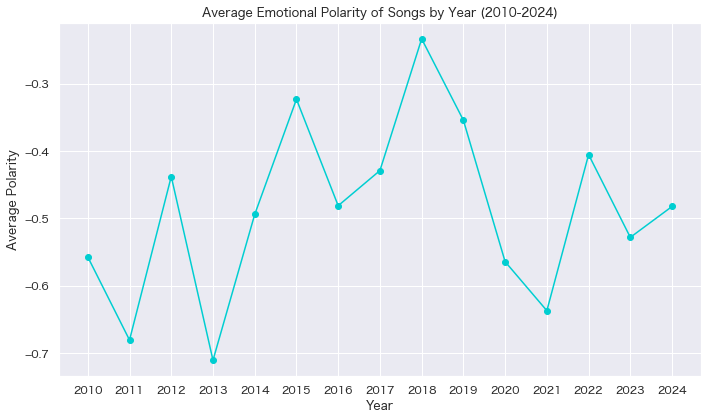

In [1543]:
cleandf['date'] = pd.to_datetime(cleandf['date'])

# Step 2: Extract the year from the 'date' column
cleandf['year'] = cleandf['date'].dt.year

# Step 3: Group by 'year' and calculate the average polarity for each year
avg_polarity_per_year = cleandf.groupby('year')['avg_polarity'].mean()

# Step 4: Plot the average polarity per year
plt.figure(figsize=(10, 6))
avg_polarity_per_year.plot(kind='line', marker='o', linestyle='-', color='darkturquoise')

# Add titles and labels
plt.title('Average Emotional Polarity of Songs by Year (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Average Polarity')
plt.grid(True)
plt.xticks(range(2010, 2025))  # To show years from 2010 to 2024 on the x-axis

# Step 5: Show the plot
plt.tight_layout()
plt.show()

In [1546]:
cleandf_lyricist = cleandf.explode("lyricist").reset_index(drop=True)

In [1548]:
valid_lyricists = ['Fukase', 'Nakajin', 'Saori']
cleandf_lyricist['lyricist'] = cleandf_lyricist['lyricist'].str.strip()
cleandf_lyricist = cleandf_lyricist[cleandf_lyricist['lyricist'].isin(valid_lyricists)]

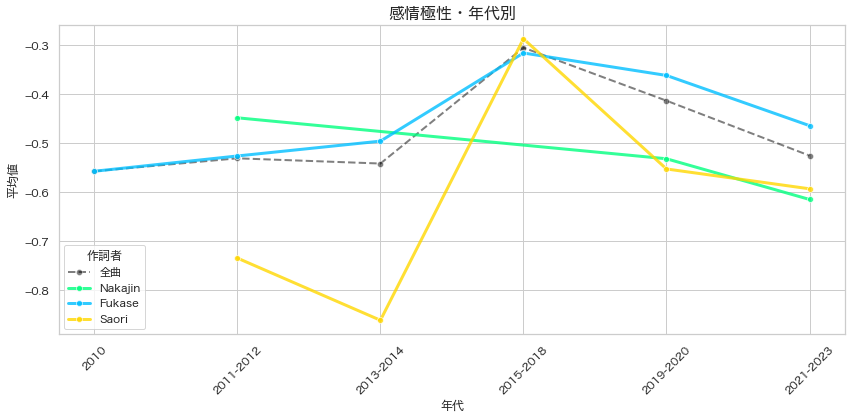

In [1611]:
def get_era(year):
    if year == 2010:
        return '2010'
    elif year in [2011, 2012]:
        return '2011-2012'
    elif year in [2013, 2014]:
        return '2013-2014'
    elif year in [2015, 2016, 2017, 2018]:
        return '2015-2018'
    elif year in [2019, 2020]:
        return '2019-2020'
    elif year in [2021, 2022, 2023]:
        return '2021-2023'

cleandf_lyricist['year'] = pd.to_datetime(cleandf_lyricist['date']).dt.year
cleandf_lyricist['era'] = cleandf_lyricist['year'].apply(get_era)

# calculate the average polarity per era and lyricist
avg_polarity_by_era = cleandf_lyricist.groupby(['era'])['avg_polarity'].mean().reset_index()
avg_polarity_by_lyricist = cleandf_lyricist.groupby(['era', 'lyricist'])['avg_polarity'].mean().reset_index()

plt.figure(figsize=(12, 6))
#plt.rcParams['axes.facecolor'] = 'black'

lyricist_colors = {
    'Nakajin': 'springgreen',
    'Fukase': 'deepskyblue',
    'Saori': 'gold'
}

sns.set(font='Hiragino Sans', style="whitegrid")
ax = sns.lineplot(data=avg_polarity_by_era, x='era', y='avg_polarity', marker='o', linestyle='dashed',label='全曲', color='black', alpha=0.5,linewidth=2)

for lyricist in ['Nakajin', 'Fukase', 'Saori']:
    lyricist_data = avg_polarity_by_lyricist[avg_polarity_by_lyricist['lyricist'] == lyricist]
    sns.lineplot(data=lyricist_data, x='era', y='avg_polarity', marker='o', linewidth = '3', alpha = 0.8, label=lyricist, color=lyricist_colors[lyricist])

plt.title('感情極性・年代別', fontsize=16)
ax.set_facecolor('white')
plt.xlabel('年代', fontsize=12)
plt.ylabel('平均値', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='作詞者', loc='lower left')

# Show the plot
plt.tight_layout()
plt.show()


In [1570]:
avg_polarity_by_lyricist

,era,lyricist,avg_polarity
0,2010,Fukase,-0.557146
1,2011-2012,Fukase,-0.526009
2,2011-2012,Nakajin,-0.448215
3,2011-2012,Saori,-0.734139
4,2013-2014,Fukase,-0.495781
5,2013-2014,Saori,-0.860848
6,2015-2018,Fukase,-0.316109
7,2015-2018,Saori,-0.287163
8,2019-2020,Fukase,-0.361863
9,2019-2020,Nakajin,-0.531696


In [1539]:
df_list

[         名詞  頻度
 62       世界    50
 69         僕    48
 46       太陽    24
 144        今    19
 181      平和    18
 ..        ...   ...
 211        風     1
 214    バトル     1
 218  ヒーロー     1
 220      運命     1
 336      ママ     1
 
 [171 rows x 2 columns],
        名詞  頻度
 22       僕    59
 17     僕ら    48
 24     世界    35
 102      君    29
 57       何    27
 ..      ...   ...
 202    挫折     1
 201      謂     1
 199  コイツ     1
 1      午前     1
 456    争い     1
 
 [205 rows x 2 columns],
          名詞  頻度
 8          君    72
 56         僕    47
 0        僕ら    22
 53         人    16
 190      今宵    13
 ..        ...   ...
 121      同志     1
 127      雪山     1
 128  オカルト     1
 129        類     1
 289      全て     1
 
 [198 rows x 2 columns],
      名詞  頻度
 257    僕    39
 266    君    37
 263    人    17
 441    雨    14
 382    何    14
 ..    ...   ...
 326  夫婦     1
 325  毎日     1
 278    銃     1
 272  上官     1
 267  横顔     1
 
 [183 rows x 2 columns],
        名詞  頻度
 6        君    92
 92     

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Example of lyric data (you'll want to replace this with the actual lyrics)
lyrics = [
    "人が生まれて何万年？それは信じる光によって違う光が生み出す強烈な影正しい道を指す光はやがて魔女を探すサーチライトへそれはまるで現代のアレみたい人の不幸から垂れ流される蜜に群がる働き蟻魔女を探せ　魔女を捕まえろ正義の名の下に焼き払え僕等は何度も繰り返す本能に眠る凶暴な正義人の不幸から垂れ流される蜜に群がる働かない蜂昔の時代は良かったとか今の若者は駄目だとかいつの時代にもよくいる大量生産型普通のオッサン正論で殴られた人々殺しよりも非難される人々こんなの皆やってんjあ、間に合わなかったもうぐちゃぐちゃだよ頭ん中頭空っぽで踊ろうよそれのが彼等と同じでしょう？この際、魔女も踊ったらどうだい？インターネットに監視されてるそこら中にいる匿名パパラッチ磔られた人を横目で見る分かっているけど口には出さない全国各地日本列島　お祭り騒ぎ生け贄献上繋いでくんだ点と線を　善悪なんて本当に適当僕等はいつでも他人事いじめをするのはいつだって彼等だしクソな上司も彼等だし悪者はいつだって彼等なんだどこにいるんだ腐った人間みんな被害者で加害者が少ないもしかして僕等が加害者？面白い事言うねぇもうぐちゃぐちゃだよ頭ん中頭空っぽで踊ろうよそれのが僕等と同じでしょう？この際、魔女も踊ったらどうだい？もうぐちゃぐちゃだよ頭ん中頭空っぽで踊ろうよそれのが僕等と同じでしょう？この際、魔女も踊ったらどうだい？",
    "鏡に映る私は透明だった分かってた事でも知らないままの方が良かった私は君を濡らすこの忌々しい雨から君を守る為のそれだけの傘それは自分で決めたようで運命みたいなもの何も望んではいけない　傷付くのが怖いからもう一度あの日に戻れたとしても繰り返してしまうでしょう　私はきっとそうこの雨がこのままずっと降れば願ってはいけない　そんな事は分かってる　だけど君に降る雨が　いつの日か上がって青空を望んだらその時私はきっともっと自分の事をこんなに知らなければもう少し幸せな未来も望めたのかなあの雪の日　私を閉じ空を見上げた泣いているように見えた笑顔に私は触れられない哀しくて美しい思い出が走馬灯のように　希望がちらついてしまうこの醜くて本当の気持ちが強くなる前にきっと吐き気がするほど眩しい太陽私の気持ちは自由だと誰かが言ったそんな事ないわ　運命よりも変えられないのこの雨がこのままずっと降れば願ってはいけない　そんな事は分かっていたはず君に降る雨が　いつの日か上がって青空を望んだらその時私はきっと雨が静かに上がり傘立てに置かれた傘忘れた事さえ忘れられてしまったような"
]

# Initialize Tokenizer to convert text into tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lyrics)
total_words = len(tokenizer.word_index) + 1  # +1 for padding

# Convert lyrics to sequences of integers
input_sequences = []
for line in lyrics:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

# Pad sequences for uniform length
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Prepare X (input) and Y (output) for training
X, Y = input_sequences[:,:-1], input_sequences[:,-1]
Y = tf.keras.utils.to_categorical(Y, num_classes=total_words)

In [1]:
cleandf.head(1)

NameError: name 'cleandf' is not defined